# Welcome to Assignment 4 -- Part 1

In this part of the assignment, wou will train a simple Vanilla RNN and LSTM model on Adding Problem using `PyTorch`

This file is a Jupyter Notebook. You can double-click on section headers to show code and run each section with Shift+Enter.


**IMPORTANT:** You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [1]:
#@title ## 0.1 Mounting your Drive and setting up mount symlink.

#@markdown By executing this cell, you will mount your Google Drive, set
#@markdown up mount symlink, and apt install requirements.

#@markdown Your work will be stored in a folder called `ece421_f2024_A4_folder`
#@markdown by default to prevent Colab instance timeouts from deleting your
#@markdown edits.


import os
from google.colab import drive
from importlib import reload
drive.mount('/content/gdrive', force_remount=True)

## setting the path parameters and creating the folder if needed
DRIVE_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## make a symlink
SYM_PATH = '/content/ece421_f2024_A4_folder'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

!apt install the requirements
!apt update
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        ffmpeg
!apt-get install python-opengl -y
!apt install xvfb -y

Mounted at /content/gdrive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package requirements
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,224 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backp

In [ ]:
#@title ## 0.2 Cloning homework repository

#@markdown We do not want to mess up with your changes to the previous
#@markdown assignment. So, we create a new directory, named
#@markdown `ece421_f2024_A4_folder`, and will clone the latest version of the
#@markdown assignments repository there.

#@markdown Similar to the previous assignments, you may be promped to restart
#@markdown your session.
#@markdown We will reset the working directory and reload the required modules
#@markdown in the following cells.

#@markdown **NOTE:** By executing this cell, the assignment files will be
#@markdown downloaded to you google drive. You can click on the folder icon on
#@markdown the left panel and navigate through the assignment directory. To
#@markdown start editing a file in this assignment, you can navigate to the file
#@markdown using the left panel and double click on it.

#@markdown **NOTE:** You just need to run this cell once.


A4_SYM_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder'
%cd $A4_SYM_PATH

!git clone https://github.com/erfanmeskar/ece421fall24_assignments.git

REPO_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments'
%cd $REPO_PATH

/content/gdrive/MyDrive/ece421_f2024_A4_folder
Cloning into 'ece421fall24_assignments'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 83 (delta 24), reused 71 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 24.52 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments


In [2]:
#@title ## 0.3 Importing the required modules


ASSIGNMENT_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments/A4'
%cd $ASSIGNMENT_PATH

from importlib import reload
import numpy as np
import random
import pickle as pk
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import train
import make_dataset
import models
import TrainRNN
import TrainLSTM
import util

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments/A4


# 1. Adding Problem with Vanilla RNN and LSTM

In [9]:
#@title Playing around with a very small dataset

#@markdown In the `make_dataset.py` file, we provided you a dataset constructor
#@markdown which you will be using for this assignment. By calling the function
#@markdown `make_adding_train_val_dataset` from `make_dataset.py`, you can
#@markdown create a dataset for our Adding Problem, which will be used to train
#@markdown your single layer vanilla RNN and LSTM models.

#@markdown You do not need to modify `make_dataset.py`. However, I strongly
#@markdown suggest you to skim through this file to understand how the dataset
#@markdown was generated. Moreover, there are some comments in this file which
#@markdown you may find helpful with implementing the other parts of this
#@markdown assignment.

#@markdown - Use type() to checkout the type of this dataset. What do you see?

#@markdown - How can you find the number of datapoints in this dataset?
#@markdown Any custome made subclass of torch.utils.data.Dataset must implement
#@markdown a __ len__ () method. You can use that to find the number of
#@markdown datapoints in your dataset. Or, simply use the shorthand len(). For
#@markdown instance, you can use len(MyDataset) instead of MyDataset.__ len__ ().

#@markdown - How can we show the kth datapoint in this dataset? This can be done
#@markdown simply by regular indexing that we would use for datastructures like
#@markdown list. For instance, MyDataset[k-1] gives you the k_th datapoint.

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)
reload(TrainLSTM)

from make_dataset import make_adding_train_val_dataset

ToyTrainSet, ToyValSet = make_adding_train_val_dataset(train_count=20,
                                                        val_count=4,
                                                        sequence_length=10)


print(f"ToyTrainset is an object of our custom made class: {type(ToyTrainSet)}")
print(f"Its parent class is: {ToyTrainSet.__class__.__bases__}")

print(f"\nThere are {len(ToyTrainSet)} datapoints in the training set")
print(f"There are {ToyValSet.__len__()} datapoints in the test set")

datapoint_1 = ToyTrainSet[0]
print(f"\nFirst datapoint in the dataset:\n{datapoint_1}")

print(f"\nFirst datapoint: Input sequence size\n {datapoint_1[0].size()}")
print(f"\nFirst datapoint: Label size\n {datapoint_1[1].size()}")

ToyTrainset is an object of our custom made class: <class 'make_dataset.CustomAddingDataset'>
Its parent class is: (<class 'torch.utils.data.dataset.Dataset'>,)

There are 20 datapoints in the training set
There are 4 datapoints in the test set

First datapoint in the dataset:
(tensor([[0.4794, 0.0000],
        [0.8833, 0.0000],
        [0.5218, 0.0000],
        [0.1192, 0.0000],
        [0.4445, 0.0000],
        [0.3460, 1.0000],
        [0.8324, 0.0000],
        [0.9880, 1.0000],
        [0.5659, 0.0000],
        [0.0648, 0.0000]]), tensor([[1.3340]]))

First datapoint: Input sequence size
 torch.Size([10, 2])

First datapoint: Label size
 torch.Size([1, 1])


In [3]:
#@title ## 1.1 Generating a Datasets with Sequence Length of 10, 25, and 50

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)

from make_dataset import make_adding_train_val_dataset

# Let's Generate a dataset with 10000 training datapoints and 1000 validation
# datapoints. Each dapoint has a sequence length of 10
Add10Trainset, Add10Valset = make_adding_train_val_dataset(train_count=10000,
                                                           val_count=1000,
                                                           sequence_length=10)

Add25Trainset, Add25Valset = make_adding_train_val_dataset(train_count=10000,
                                                           val_count=1000,
                                                           sequence_length=25)

Add50Trainset, Add50Valset = make_adding_train_val_dataset(train_count=10000,
                                                           val_count=1000,
                                                           sequence_length=50)

Epoch 1 -------------------
Train Avg loss: 0.161235
Test  Avg loss: 0.149907
Epoch 2 -------------------
Train Avg loss: 0.120474
Test  Avg loss: 0.115807
Epoch 3 -------------------
Train Avg loss: 0.054652
Test  Avg loss: 0.055945
Epoch 4 -------------------
Train Avg loss: 0.026593
Test  Avg loss: 0.026967
Epoch 5 -------------------
Train Avg loss: 0.017101
Test  Avg loss: 0.017865
Epoch 6 -------------------
Train Avg loss: 0.012265
Test  Avg loss: 0.012549
Epoch 7 -------------------
Train Avg loss: 0.009948
Test  Avg loss: 0.010202
Epoch 8 -------------------
Train Avg loss: 0.009066
Test  Avg loss: 0.009222
Epoch 9 -------------------
Train Avg loss: 0.006324
Test  Avg loss: 0.006358
Epoch 10 -------------------
Train Avg loss: 0.004282
Test  Avg loss: 0.004518
Epoch 11 -------------------
Train Avg loss: 0.004614
Test  Avg loss: 0.004689
Epoch 12 -------------------
Train Avg loss: 0.009045
Test  Avg loss: 0.008754
Epoch 13 -------------------
Train Avg loss: 0.002644
Test  A

Train Avg loss: 0.002330
Test  Avg loss: 0.002458
Done!


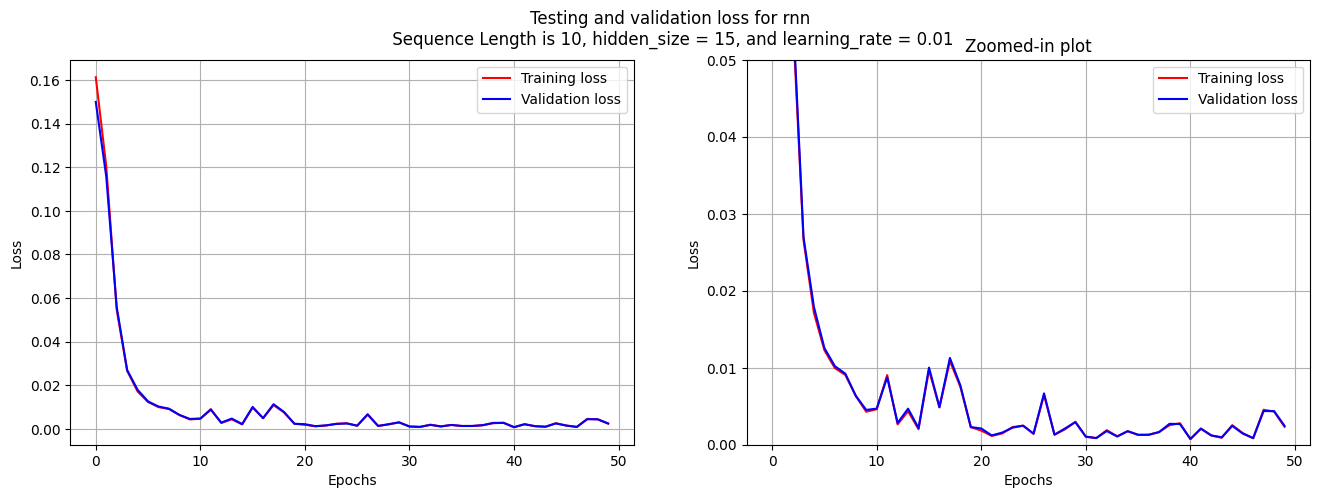

In [7]:
#@title ## 1.2 Find the best **vanilla RNN** model for the dataset with sequence_length=10

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)


# What should be the value of RNN_input_size and RNN_output_size?
RNN_input_size = 2
RNN_output_size = 1

# Performed a grid search over the hyperparameters below
opt_name = 'adam' # let's stick to adam.
RNN_hidden_size = 15 # choose from 5, or 15
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

RNNmodel10, train_loss10, val_loss10 = \
  TrainRNN.train1LayerVanillaRNN(Add10Trainset,
                                   Add10Valset,
                                   RNN_input_size,
                                   RNN_output_size,
                                   RNN_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   batch_size=64,
                                   max_epoch=50)


# Plot the loss value for train/test set for each epoch
util.plot_loss(train_loss10,
          val_loss10,
          sequence_len=10,
          hidden_size=RNN_hidden_size,
          lr=learning_rate,
          model_type='rnn')

Epoch 1 -------------------
Train Avg loss: 0.167888
Test  Avg loss: 0.164174
Epoch 2 -------------------
Train Avg loss: 0.170134
Test  Avg loss: 0.165542
Epoch 3 -------------------
Train Avg loss: 0.167740
Test  Avg loss: 0.162272
Epoch 4 -------------------
Train Avg loss: 0.168019
Test  Avg loss: 0.164142
Epoch 5 -------------------
Train Avg loss: 0.168061
Test  Avg loss: 0.162392
Epoch 6 -------------------
Train Avg loss: 0.167578
Test  Avg loss: 0.162541
Epoch 7 -------------------
Train Avg loss: 0.167547
Test  Avg loss: 0.163518
Epoch 8 -------------------
Train Avg loss: 0.167396
Test  Avg loss: 0.162834
Epoch 9 -------------------
Train Avg loss: 0.167864
Test  Avg loss: 0.162715
Epoch 10 -------------------
Train Avg loss: 0.168017
Test  Avg loss: 0.161616
Epoch 11 -------------------
Train Avg loss: 0.167923
Test  Avg loss: 0.162354
Epoch 12 -------------------
Train Avg loss: 0.168803
Test  Avg loss: 0.162723
Epoch 13 -------------------
Train Avg loss: 0.168096
Test  A

Train Avg loss: 0.168922
Test  Avg loss: 0.162848
Done!


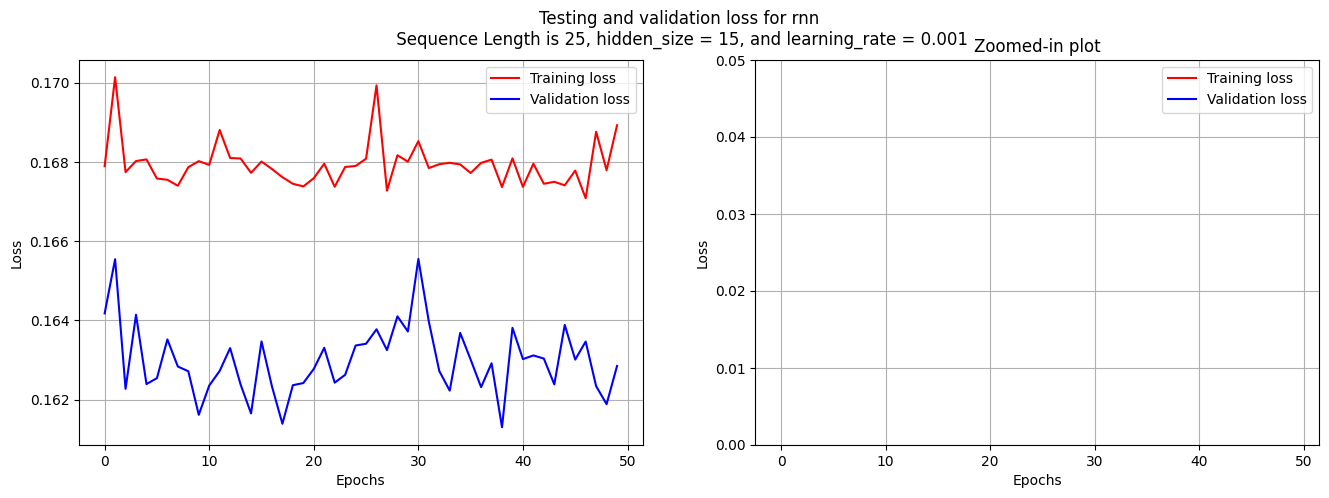

In [ ]:
#@title ## 1.3 Find the best **vanilla RNN** model for the dataset with sequence_length=25

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)


# What should be the value of RNN_input_size and RNN_output_size?
RNN_input_size = 2
RNN_output_size = 1

# Performed a grid search over the hyperparameters below
opt_name = 'adam' # let's stick to adam.
RNN_hidden_size = 15 # choose from 5, or 15
learning_rate = 0.001 # choose from 0.1, 0.01, or 0.001

RNNmodel25, train_loss25, val_loss25 = \
  TrainRNN.train1LayerVanillaRNN(Add25Trainset,
                                   Add25Valset,
                                   RNN_input_size,
                                   RNN_output_size,
                                   RNN_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   batch_size=64,
                                   max_epoch=50)

# Plot the loss value for train/test set for each epoch
util.plot_loss(train_loss25,
          val_loss25,
          sequence_len=25,
          hidden_size=RNN_hidden_size,
          lr=learning_rate,
          model_type='rnn')

Epoch 1 -------------------
Train Avg loss: 0.166894
Test  Avg loss: 0.180665
Epoch 2 -------------------
Train Avg loss: 0.166911
Test  Avg loss: 0.179938
Epoch 3 -------------------
Train Avg loss: 0.166277
Test  Avg loss: 0.179383
Epoch 4 -------------------
Train Avg loss: 0.168384
Test  Avg loss: 0.184889
Epoch 5 -------------------
Train Avg loss: 0.166796
Test  Avg loss: 0.179317
Epoch 6 -------------------
Train Avg loss: 0.166314
Test  Avg loss: 0.181268
Epoch 7 -------------------
Train Avg loss: 0.169651
Test  Avg loss: 0.186680
Epoch 8 -------------------
Train Avg loss: 0.166379
Test  Avg loss: 0.181044
Epoch 9 -------------------
Train Avg loss: 0.167038
Test  Avg loss: 0.180233
Epoch 10 -------------------
Train Avg loss: 0.166560
Test  Avg loss: 0.180326
Epoch 11 -------------------
Train Avg loss: 0.168255
Test  Avg loss: 0.183579
Epoch 12 -------------------
Train Avg loss: 0.166546
Test  Avg loss: 0.181151
Epoch 13 -------------------
Train Avg loss: 0.168915
Test  A

Train Avg loss: 0.177322
Test  Avg loss: 0.186087
Done!


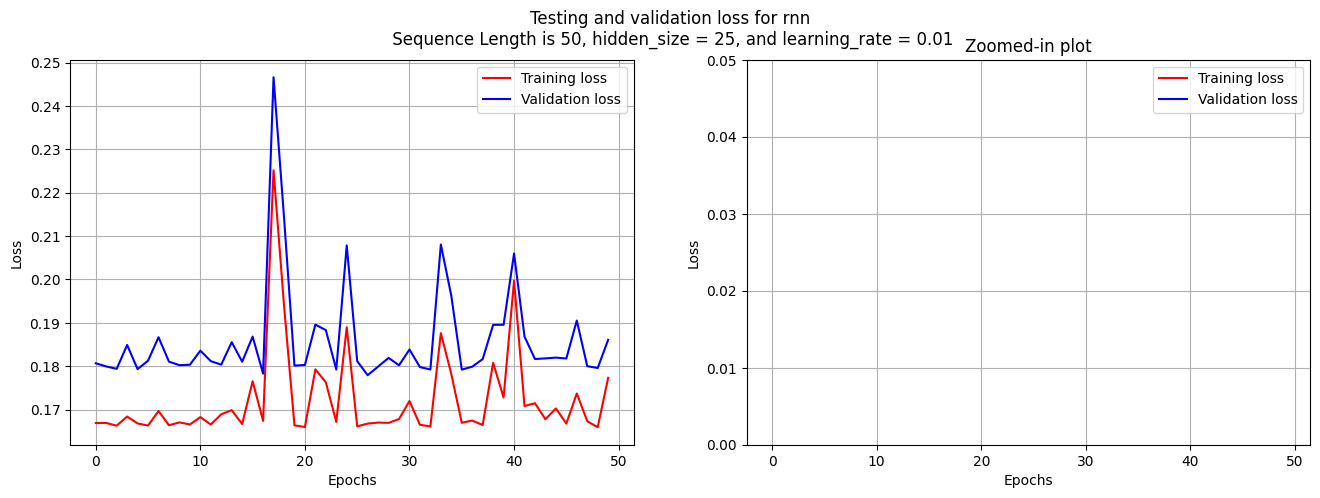

In [ ]:
#@title ## 1.4 Find the best **vanilla RNN** model for the dataset with sequence_length=50

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)


# What should be the value of RNN_input_size and RNN_output_size?
RNN_input_size = 2
RNN_output_size = 1

# Performed a grid search over the hyperparameters below
opt_name = 'adam' # let's stick to adam.
RNN_hidden_size = 25 # choose from 5, or 25
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

RNNmodel50, train_loss50, val_loss50 = \
  TrainRNN.train1LayerVanillaRNN(Add50Trainset,
                                   Add50Valset,
                                   RNN_input_size,
                                   RNN_output_size,
                                   RNN_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   batch_size=64,
                                   max_epoch=50)

# Plot the loss value for train/test set for each epoch
util.plot_loss(train_loss50,
          val_loss50,
          sequence_len=50,
          hidden_size=RNN_hidden_size,
          lr=learning_rate,
          model_type='rnn')


Training with seq_len=50, hidden_size=5, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.166250
Test  Avg loss: 0.158241
Epoch 2 -------------------
Train Avg loss: 0.166788
Test  Avg loss: 0.157391
Epoch 3 -------------------
Train Avg loss: 0.164874
Test  Avg loss: 0.156637
Epoch 4 -------------------
Train Avg loss: 0.166196
Test  Avg loss: 0.159096
Epoch 5 -------------------
Train Avg loss: 0.162085
Test  Avg loss: 0.154903
Epoch 6 -------------------
Train Avg loss: 0.173214
Test  Avg loss: 0.163887
Epoch 7 -------------------
Train Avg loss: 0.164914
Test  Avg loss: 0.158780
Epoch 8 -------------------
Train Avg loss: 0.155821
Test  Avg loss: 0.148274
Epoch 9 -------------------
Train Avg loss: 0.162994
Test  Avg loss: 0.155073
Epoch 10 -------------------
Train Avg loss: 0.079618
Test  Avg loss: 0.076721
Epoch 11 -------------------
Train Avg loss: 0.081185
Test  Avg loss: 0.080404
Epoch 12 -------------------
Train Avg loss: 0.167232
Test  Avg loss: 0.158864


Train Avg loss: 0.165875
Test  Avg loss: 0.157472
Done!


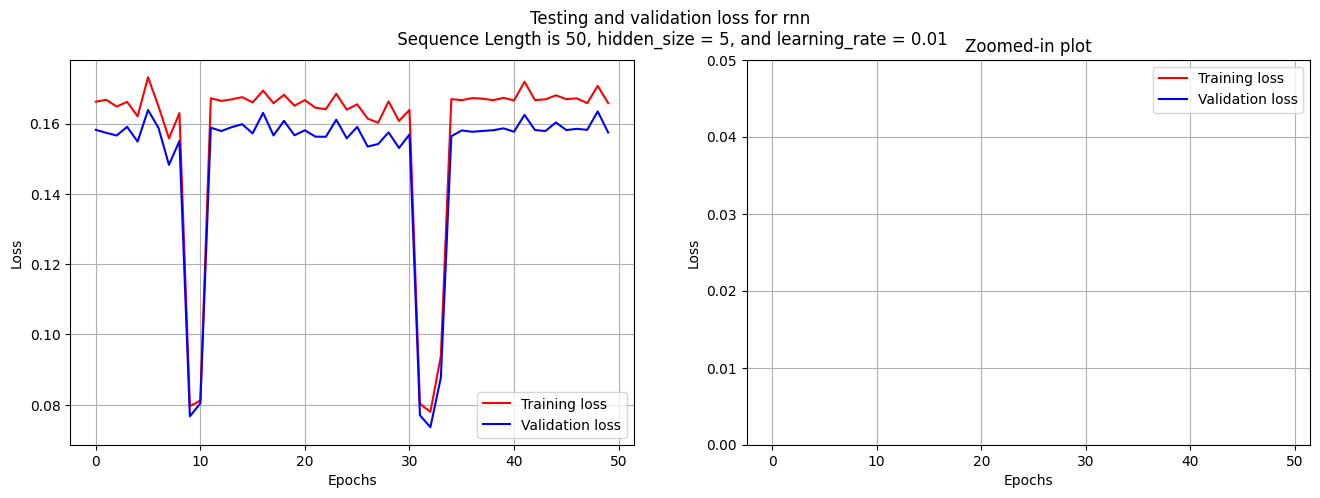


Training with seq_len=50, hidden_size=5, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.233998
Test  Avg loss: 0.222396
Epoch 2 -------------------
Train Avg loss: 0.167391
Test  Avg loss: 0.158322
Epoch 3 -------------------
Train Avg loss: 0.167003
Test  Avg loss: 0.158599
Epoch 4 -------------------
Train Avg loss: 0.167143
Test  Avg loss: 0.158306
Epoch 5 -------------------
Train Avg loss: 0.167030
Test  Avg loss: 0.157279
Epoch 6 -------------------
Train Avg loss: 0.167217
Test  Avg loss: 0.158296
Epoch 7 -------------------
Train Avg loss: 0.166404
Test  Avg loss: 0.158198
Epoch 8 -------------------
Train Avg loss: 0.167504
Test  Avg loss: 0.158499
Epoch 9 -------------------
Train Avg loss: 0.166701
Test  Avg loss: 0.157973
Epoch 10 -------------------
Train Avg loss: 0.166299
Test  Avg loss: 0.157314
Epoch 11 -------------------
Train Avg loss: 0.167039
Test  Avg loss: 0.157452
Epoch 12 -------------------
Train Avg loss: 0.167083
Test  Avg loss: 0.157791

Train Avg loss: 0.146303
Test  Avg loss: 0.135575
Done!


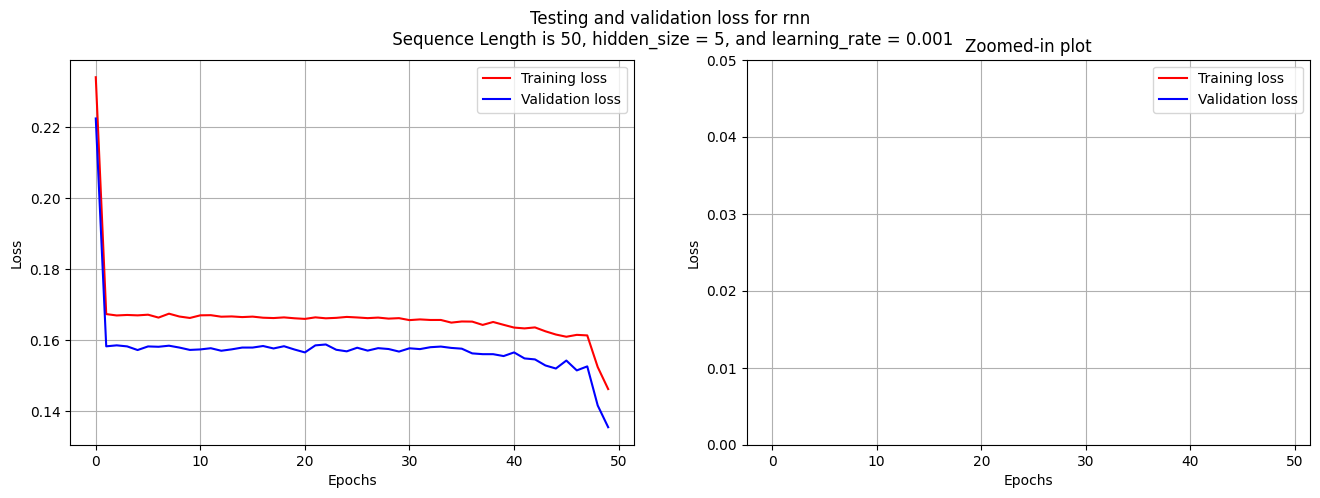


Training with seq_len=50, hidden_size=15, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.172608
Test  Avg loss: 0.163443
Epoch 2 -------------------
Train Avg loss: 0.166848
Test  Avg loss: 0.157915
Epoch 3 -------------------
Train Avg loss: 0.167856
Test  Avg loss: 0.159932
Epoch 4 -------------------
Train Avg loss: 0.176515
Test  Avg loss: 0.166321
Epoch 5 -------------------
Train Avg loss: 0.166860
Test  Avg loss: 0.157066
Epoch 6 -------------------
Train Avg loss: 0.166466
Test  Avg loss: 0.157266
Epoch 7 -------------------
Train Avg loss: 0.165983
Test  Avg loss: 0.157180
Epoch 8 -------------------
Train Avg loss: 0.165558
Test  Avg loss: 0.156677
Epoch 9 -------------------
Train Avg loss: 0.174029
Test  Avg loss: 0.168335
Epoch 10 -------------------
Train Avg loss: 0.168176
Test  Avg loss: 0.160526
Epoch 11 -------------------
Train Avg loss: 0.164848
Test  Avg loss: 0.156713
Epoch 12 -------------------
Train Avg loss: 0.162968
Test  Avg loss: 0.156722

Train Avg loss: 0.162290
Test  Avg loss: 0.153765
Done!


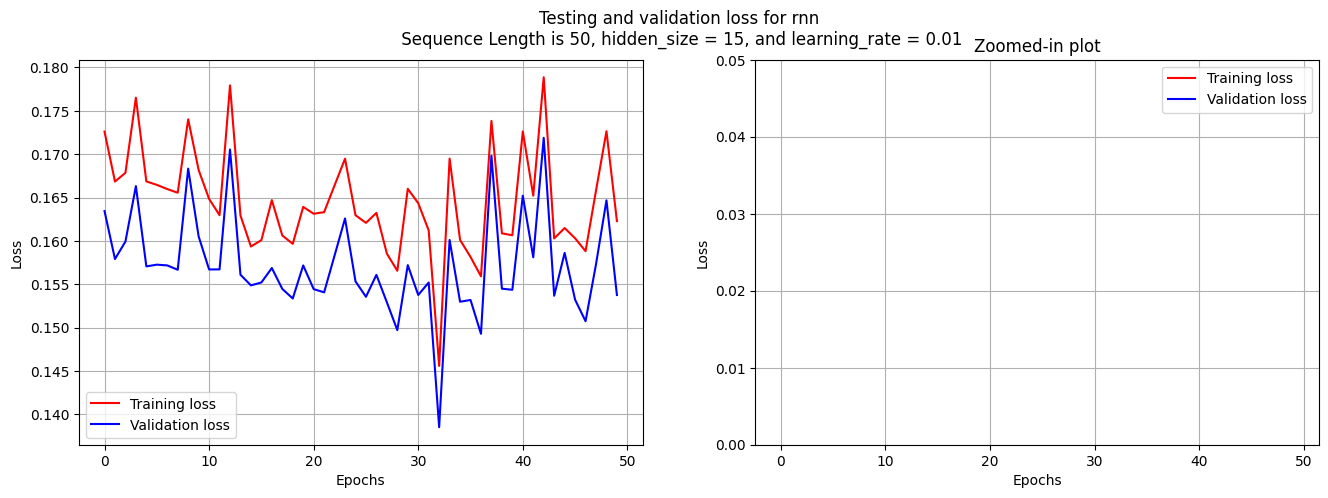


Training with seq_len=50, hidden_size=15, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.166769
Test  Avg loss: 0.158424
Epoch 2 -------------------
Train Avg loss: 0.166312
Test  Avg loss: 0.158536
Epoch 3 -------------------
Train Avg loss: 0.166382
Test  Avg loss: 0.158592
Epoch 4 -------------------
Train Avg loss: 0.167657
Test  Avg loss: 0.157974
Epoch 5 -------------------
Train Avg loss: 0.165881
Test  Avg loss: 0.158141
Epoch 6 -------------------
Train Avg loss: 0.166464
Test  Avg loss: 0.157035
Epoch 7 -------------------
Train Avg loss: 0.166940
Test  Avg loss: 0.156489
Epoch 8 -------------------
Train Avg loss: 0.166022
Test  Avg loss: 0.155813
Epoch 9 -------------------
Train Avg loss: 0.166425
Test  Avg loss: 0.157714
Epoch 10 -------------------
Train Avg loss: 0.165894
Test  Avg loss: 0.157827
Epoch 11 -------------------
Train Avg loss: 0.165461
Test  Avg loss: 0.155725
Epoch 12 -------------------
Train Avg loss: 0.165860
Test  Avg loss: 0.15646

Train Avg loss: 0.160912
Test  Avg loss: 0.152963
Done!


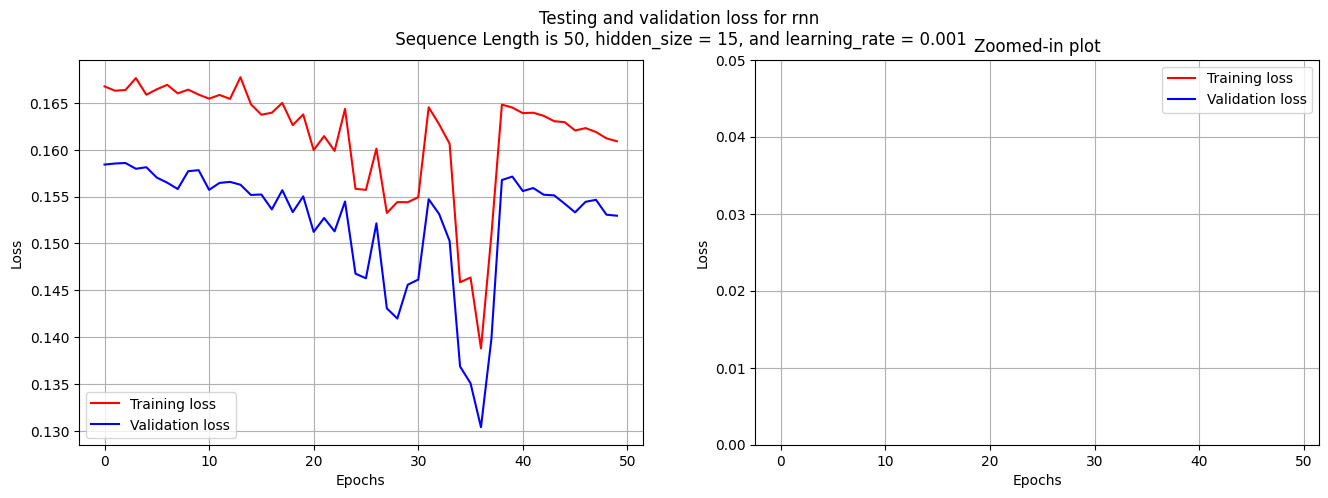


Training with seq_len=50, hidden_size=25, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.169497
Test  Avg loss: 0.161816
Epoch 2 -------------------
Train Avg loss: 0.168226
Test  Avg loss: 0.158601
Epoch 3 -------------------
Train Avg loss: 0.167254
Test  Avg loss: 0.158118
Epoch 4 -------------------
Train Avg loss: 0.167588
Test  Avg loss: 0.158041
Epoch 5 -------------------
Train Avg loss: 0.166831
Test  Avg loss: 0.157069
Epoch 6 -------------------
Train Avg loss: 0.174034
Test  Avg loss: 0.164447
Epoch 7 -------------------
Train Avg loss: 0.165876
Test  Avg loss: 0.157408
Epoch 8 -------------------
Train Avg loss: 0.163879
Test  Avg loss: 0.156602
Epoch 9 -------------------
Train Avg loss: 0.202714
Test  Avg loss: 0.194882
Epoch 10 -------------------
Train Avg loss: 0.173885
Test  Avg loss: 0.163294
Epoch 11 -------------------
Train Avg loss: 0.168872
Test  Avg loss: 0.158405
Epoch 12 -------------------
Train Avg loss: 0.167377
Test  Avg loss: 0.157779

Train Avg loss: 0.169636
Test  Avg loss: 0.160399
Done!


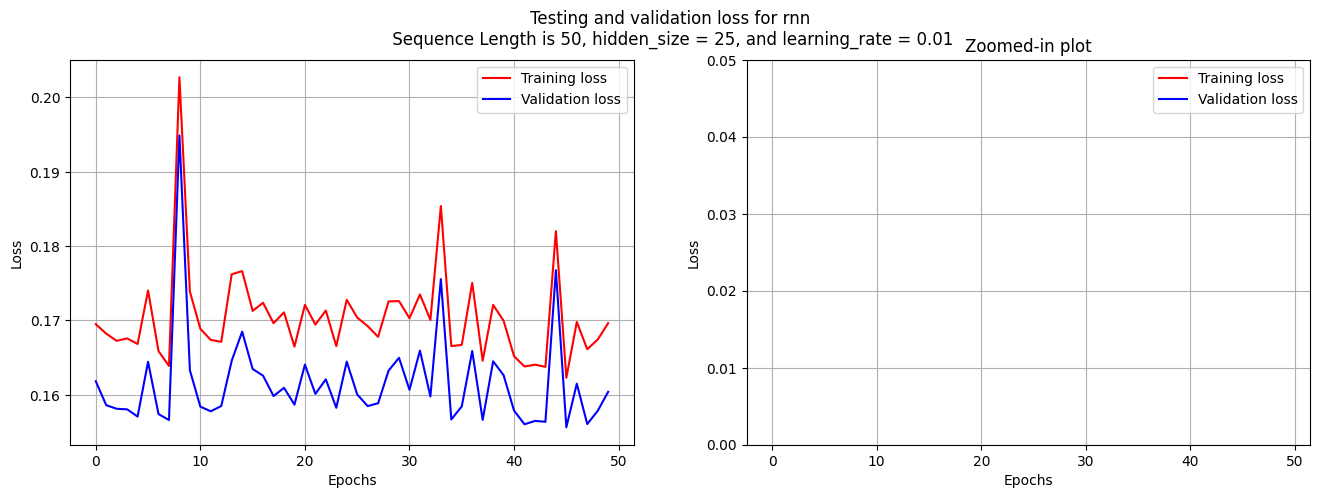


Training with seq_len=50, hidden_size=25, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.166051
Test  Avg loss: 0.157061
Epoch 2 -------------------
Train Avg loss: 0.166956
Test  Avg loss: 0.155536
Epoch 3 -------------------
Train Avg loss: 0.166356
Test  Avg loss: 0.157522
Epoch 4 -------------------
Train Avg loss: 0.166366
Test  Avg loss: 0.158176
Epoch 5 -------------------
Train Avg loss: 0.165969
Test  Avg loss: 0.156835
Epoch 6 -------------------
Train Avg loss: 0.166379
Test  Avg loss: 0.158229
Epoch 7 -------------------
Train Avg loss: 0.165881
Test  Avg loss: 0.157407
Epoch 8 -------------------
Train Avg loss: 0.166147
Test  Avg loss: 0.156065
Epoch 9 -------------------
Train Avg loss: 0.165487
Test  Avg loss: 0.156656
Epoch 10 -------------------
Train Avg loss: 0.166220
Test  Avg loss: 0.157812
Epoch 11 -------------------
Train Avg loss: 0.165705
Test  Avg loss: 0.156352
Epoch 12 -------------------
Train Avg loss: 0.167037
Test  Avg loss: 0.15812

Train Avg loss: 0.012440
Test  Avg loss: 0.012364
Done!


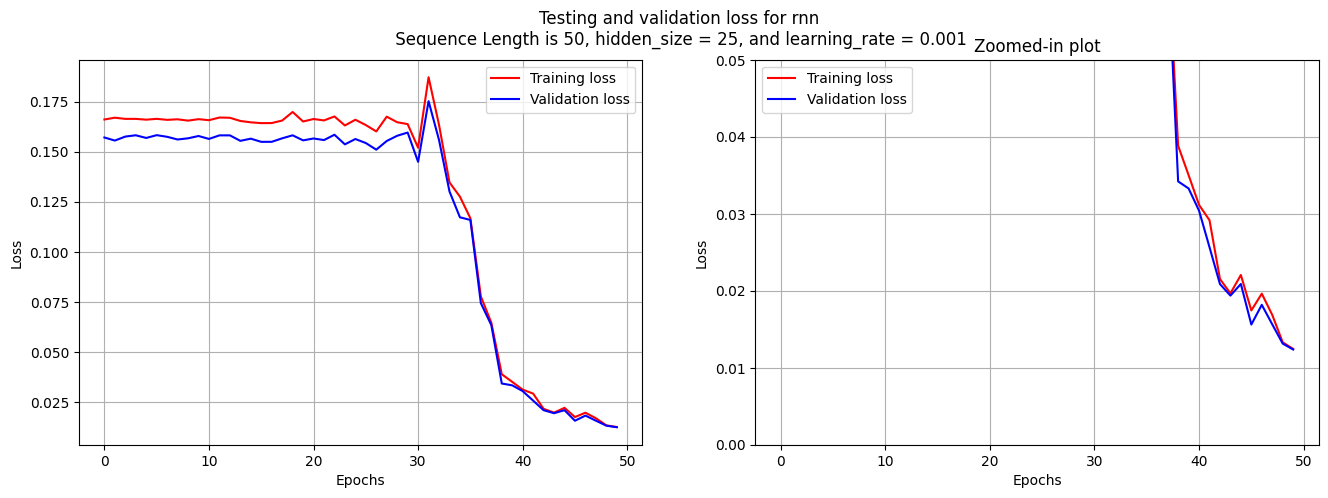


Best models for each sequence length:

Sequence length 50:
Best parameters: hidden_size=25, learning_rate=0.001
Final validation loss: 0.0124

Overall best model:
Parameters: sequence_length=50, hidden_size=25, learning_rate=0.001
Final validation loss: 0.0124


In [11]:
# @title Automate vanilla RNN grid search
reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)

# Fixed parameters
RNN_input_size = 2
RNN_output_size = 1
opt_name = 'adam'
batch_size = 64
max_epoch = 50
# sequence_lengths = [10, 25, 50] # original
sequence_lengths = [50]

# Define hyperparameter grid
# learning_rates = [0.1, 0.01, 0.001] # original
learning_rates = [0.01, 0.001]
# Define hidden sizes based on sequence length
hidden_sizes_map = {
    10: [5, 15],
    25: [5, 15],
    50: [5, 15, 25]  # Additional hidden size for seq_len 50
}

# Dictionary to store results
results = {}

# Grid search
for seq_len in sequence_lengths:
    # Get the appropriate datasets for this sequence length
    train_data = globals()[f'Add{seq_len}Trainset']
    val_data = globals()[f'Add{seq_len}Valset']

    # Get appropriate hidden sizes for this sequence length
    hidden_sizes = hidden_sizes_map[seq_len]

    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            print(f"\nTraining with seq_len={seq_len}, hidden_size={hidden_size}, learning_rate={lr}")

            model, train_loss, val_loss = TrainRNN.train1LayerVanillaRNN(
                train_data,
                val_data,
                RNN_input_size,
                RNN_output_size,
                hidden_size,
                optimizer_name=opt_name,
                lr=lr,
                batch_size=batch_size,
                max_epoch=max_epoch
            )

            # Store results
            key = f"seq{seq_len}_h{hidden_size}_lr{lr}"
            results[key] = {
                'model': model,
                'train_loss': train_loss,
                'val_loss': val_loss,
                'params': {
                    'seq_len': seq_len,
                    'hidden_size': hidden_size,
                    'lr': lr
                }
            }

            # Plot individual training run
            util.plot_loss(
                train_loss,
                val_loss,
                sequence_len=seq_len,
                hidden_size=hidden_size,
                lr=lr,
                model_type='rnn'
            )

# Find best model for each sequence length
print("\nBest models for each sequence length:")
for seq_len in sequence_lengths:
    seq_results = {k: v for k, v in results.items() if v['params']['seq_len'] == seq_len}
    best_key = min(seq_results.keys(), key=lambda k: results[k]['val_loss'][-1])
    print(f"\nSequence length {seq_len}:")
    print(f"Best parameters: hidden_size={results[best_key]['params']['hidden_size']}, "
          f"learning_rate={results[best_key]['params']['lr']}")
    print(f"Final validation loss: {results[best_key]['val_loss'][-1]:.4f}")

# Find overall best model
best_key = min(results.keys(), key=lambda k: results[k]['val_loss'][-1])
print(f"\nOverall best model:")
print(f"Parameters: sequence_length={results[best_key]['params']['seq_len']}, "
      f"hidden_size={results[best_key]['params']['hidden_size']}, "
      f"learning_rate={results[best_key]['params']['lr']}")
print(f"Final validation loss: {results[best_key]['val_loss'][-1]:.4f}")

Epoch 1 -------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([16, 1, 1])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Avg loss: 0.168258
Test  Avg loss: 0.164980
Epoch 2 -------------------


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([40, 1, 1])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Avg loss: 0.167470
Test  Avg loss: 0.164494
Epoch 3 -------------------
Train Avg loss: 0.166874
Test  Avg loss: 0.164910
Epoch 4 -------------------
Train Avg loss: 0.166542
Test  Avg loss: 0.164149
Epoch 5 -------------------
Train Avg loss: 0.166933
Test  Avg loss: 0.165411
Epoch 6 -------------------
Train Avg loss: 0.166764
Test  Avg loss: 0.164281
Epoch 7 -------------------
Train Avg loss: 0.168563
Test  Avg loss: 0.166484
Epoch 8 -------------------
Train Avg loss: 0.167201
Test  Avg loss: 0.163845
Epoch 9 -------------------
Train Avg loss: 0.168169
Test  Avg loss: 0.165071
Epoch 10 -------------------
Train Avg loss: 0.166324
Test  Avg loss: 0.163980
Epoch 11 -------------------
Train Avg loss: 0.166807
Test  Avg loss: 0.163130
Epoch 12 -------------------
Train Avg loss: 0.169064
Test  Avg loss: 0.166526
Epoch 13 -------------------
Train Avg loss: 0.166875
Test  Avg loss: 0.164820
Epoch 14 -------------------
Train Avg loss: 0.167212
Test  Avg loss: 0.163892
Epoch 15 

Train Avg loss: 0.167383
Test  Avg loss: 0.164986
Done!


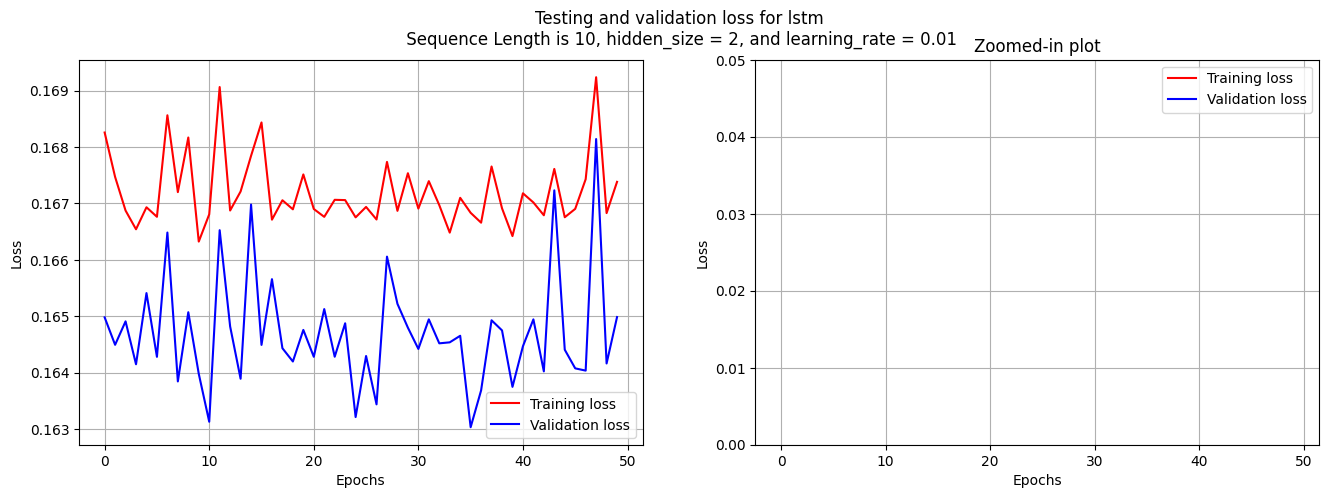

In [ ]:
#@title ## 1.5 Find the best **LSTM** model for the dataset with sequence_length=10

reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)


# What should be the value of LSTM_input_size and LSTM_output_size?
LSTM_input_size = 2
LSTM_output_size = 1

# Performed a grid search over the hyperparameters below
LSTM_hidden_size = 2 # choose from 2 or 5
opt_name = 'adam' # choose from 'sgd' or 'adam'
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

LSTM_model10, lstm_train_loss10, lstm_val_loss10 = \
  TrainLSTM.train1LayerLSTM(Add10Trainset,
                                   Add10Valset,
                                   LSTM_input_size,
                                   LSTM_output_size,
                                   LSTM_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   max_epoch=50,
                                   batch_size=64)

# Plot the loss value for train/test set for each epoch
util.plot_loss(lstm_train_loss10,
          lstm_val_loss10,
          sequence_len=10,
          hidden_size=LSTM_hidden_size,
          lr=learning_rate,
          model_type='lstm')

In [ ]:
#@title ## 1.6 Find the best **LSTM** model for the dataset with sequence_length=25

reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)


# What should be the value of LSTM_input_size and LSTM_output_size?
LSTM_input_size = ...
LSTM_output_size = ...

# Performed a grid search over the hyperparameters below
LSTM_hidden_size = ... # choose from 2 or 5
opt_name = 'adam' # choose from 'sgd' or 'adam'
learning_rate = ... # choose from 0.1, 0.01, or 0.001

LSTM_model25, lstm_train_loss25, lstm_val_loss25 = \
  TrainLSTM.train1LayerLSTM(Add25Trainset,
                                   Add25Valset,
                                   LSTM_input_size,
                                   LSTM_output_size,
                                   LSTM_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   max_epoch=50,
                                   batch_size=64)

# Plot the loss value for train/test set for each epoch
util.plot_loss(lstm_train_loss25,
          lstm_val_loss25,
          sequence_len=25,
          hidden_size=LSTM_hidden_size,
          lr=learning_rate,
          model_type='lstm')

In [ ]:
#@title ## 1.7 Find the best **LSTM** model for the dataset with sequence_length=50

reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)


# What should be the value of LSTM_input_size and LSTM_output_size?
LSTM_input_size = ...
LSTM_output_size = ...

# Performed a grid search over the hyperparameters below
LSTM_hidden_size = ... # choose from 2 or 5
opt_name = 'adam' # choose from 'sgd' or 'adam'
learning_rate = ... # choose from 0.1, 0.01, or 0.001

LSTM_model50, lstm_train_loss50, lstm_val_loss50 = \
  TrainLSTM.train1LayerLSTM(Add50Trainset,
                                   Add50Valset,
                                   LSTM_input_size,
                                   LSTM_output_size,
                                   LSTM_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   max_epoch=50,
                                   batch_size=64)

# Plot the loss value for train/test set for each epoch
util.plot_loss(lstm_train_loss50,
          lstm_val_loss50,
          sequence_len=50,
          hidden_size=LSTM_hidden_size,
          lr=learning_rate,
          model_type='lstm')


Training with seq_len=10, hidden_size=2, optimizer=sgd, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.162683
Test  Avg loss: 0.152155
Epoch 2 -------------------
Train Avg loss: 0.156401
Test  Avg loss: 0.145804
Epoch 3 -------------------
Train Avg loss: 0.151873
Test  Avg loss: 0.140074
Epoch 4 -------------------
Train Avg loss: 0.133238
Test  Avg loss: 0.122459
Epoch 5 -------------------
Train Avg loss: 0.118146
Test  Avg loss: 0.107648
Epoch 6 -------------------
Train Avg loss: 0.202821
Test  Avg loss: 0.191381
Epoch 7 -------------------
Train Avg loss: 0.123252
Test  Avg loss: 0.115793
Epoch 8 -------------------
Train Avg loss: 0.091929
Test  Avg loss: 0.085953
Epoch 9 -------------------
Train Avg loss: 0.048254
Test  Avg loss: 0.044259
Epoch 10 -------------------
Train Avg loss: 0.034897
Test  Avg loss: 0.032836
Epoch 11 -------------------
Train Avg loss: 0.024041
Test  Avg loss: 0.022052
Epoch 12 -------------------
Train Avg loss: 0.015666
Test  Avg l

Train Avg loss: 0.002008
Test  Avg loss: 0.001979
Done!


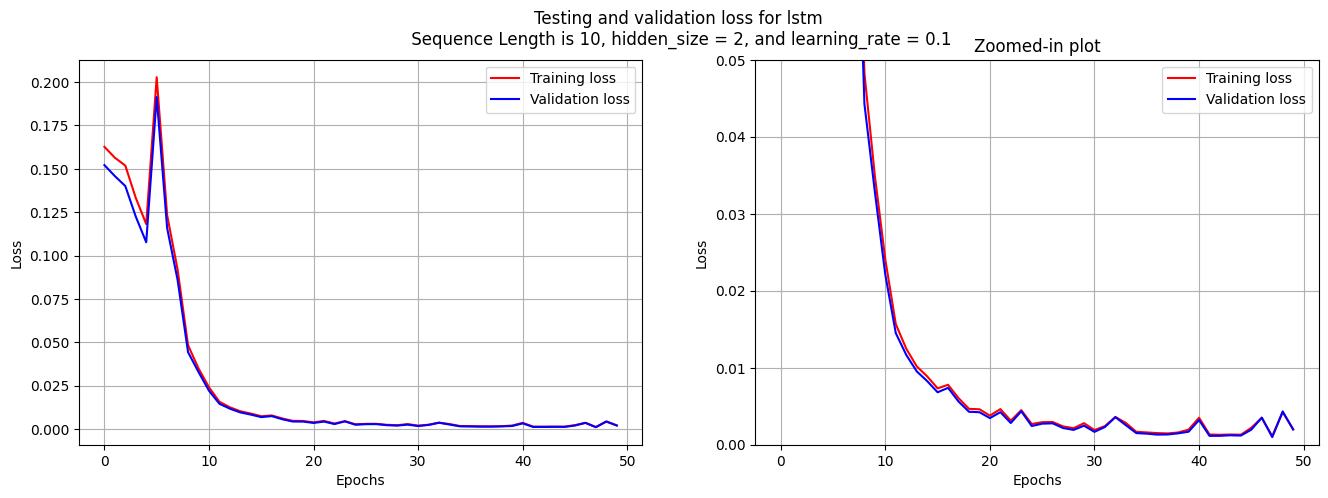


Training with seq_len=10, hidden_size=2, optimizer=sgd, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.168456
Test  Avg loss: 0.155740
Epoch 2 -------------------
Train Avg loss: 0.167239
Test  Avg loss: 0.155963
Epoch 3 -------------------
Train Avg loss: 0.167580
Test  Avg loss: 0.156449
Epoch 4 -------------------
Train Avg loss: 0.167289
Test  Avg loss: 0.157034
Epoch 5 -------------------
Train Avg loss: 0.168018
Test  Avg loss: 0.158121
Epoch 6 -------------------
Train Avg loss: 0.167221
Test  Avg loss: 0.156319
Epoch 7 -------------------
Train Avg loss: 0.166882
Test  Avg loss: 0.156876
Epoch 8 -------------------
Train Avg loss: 0.167184
Test  Avg loss: 0.156202
Epoch 9 -------------------
Train Avg loss: 0.166956
Test  Avg loss: 0.156218
Epoch 10 -------------------
Train Avg loss: 0.166969
Test  Avg loss: 0.156293
Epoch 11 -------------------
Train Avg loss: 0.166801
Test  Avg loss: 0.155402
Epoch 12 -------------------
Train Avg loss: 0.167445
Test  Avg 

Train Avg loss: 0.165835
Test  Avg loss: 0.155581
Done!


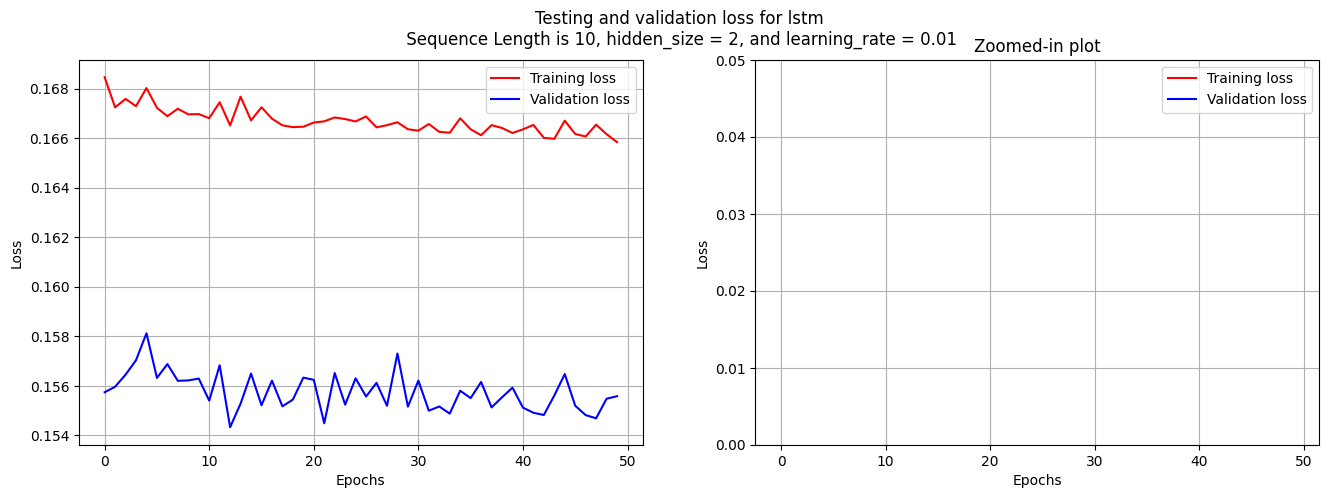


Training with seq_len=10, hidden_size=2, optimizer=sgd, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 1.405539
Test  Avg loss: 1.386087
Epoch 2 -------------------
Train Avg loss: 0.777472
Test  Avg loss: 0.764569
Epoch 3 -------------------
Train Avg loss: 0.465670
Test  Avg loss: 0.450918
Epoch 4 -------------------
Train Avg loss: 0.311331
Test  Avg loss: 0.295843
Epoch 5 -------------------
Train Avg loss: 0.236786
Test  Avg loss: 0.224017
Epoch 6 -------------------
Train Avg loss: 0.200447
Test  Avg loss: 0.187110
Epoch 7 -------------------
Train Avg loss: 0.183300
Test  Avg loss: 0.172434
Epoch 8 -------------------
Train Avg loss: 0.174728
Test  Avg loss: 0.162792
Epoch 9 -------------------
Train Avg loss: 0.170705
Test  Avg loss: 0.160004
Epoch 10 -------------------
Train Avg loss: 0.168898
Test  Avg loss: 0.157043
Epoch 11 -------------------
Train Avg loss: 0.168320
Test  Avg loss: 0.156294
Epoch 12 -------------------
Train Avg loss: 0.168433
Test  Avg

Train Avg loss: 0.166815
Test  Avg loss: 0.155790
Done!


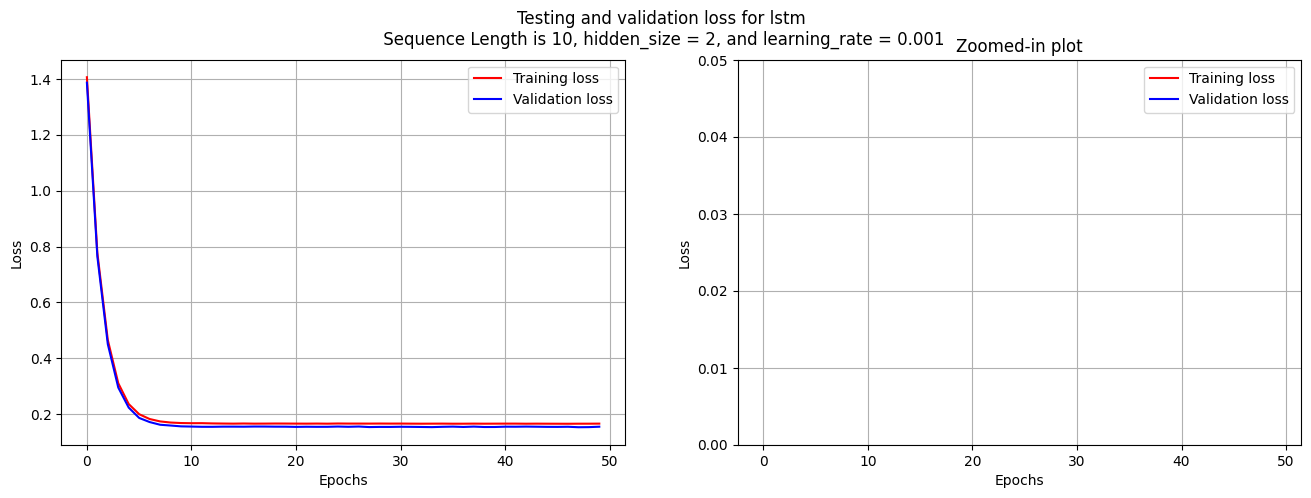


Training with seq_len=10, hidden_size=2, optimizer=adam, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.163183
Test  Avg loss: 0.152782
Epoch 2 -------------------
Train Avg loss: 0.160302
Test  Avg loss: 0.149306
Epoch 3 -------------------
Train Avg loss: 0.090293
Test  Avg loss: 0.082004
Epoch 4 -------------------
Train Avg loss: 0.024979
Test  Avg loss: 0.025626
Epoch 5 -------------------
Train Avg loss: 0.036051
Test  Avg loss: 0.037486
Epoch 6 -------------------
Train Avg loss: 0.032594
Test  Avg loss: 0.032282
Epoch 7 -------------------
Train Avg loss: 0.008862
Test  Avg loss: 0.009955
Epoch 8 -------------------
Train Avg loss: 0.008888
Test  Avg loss: 0.009164
Epoch 9 -------------------
Train Avg loss: 0.024005
Test  Avg loss: 0.024880
Epoch 10 -------------------
Train Avg loss: 0.011860
Test  Avg loss: 0.011393
Epoch 11 -------------------
Train Avg loss: 0.012868
Test  Avg loss: 0.013344
Epoch 12 -------------------
Train Avg loss: 0.002429
Test  Avg 

Train Avg loss: 0.004207
Test  Avg loss: 0.004137
Done!


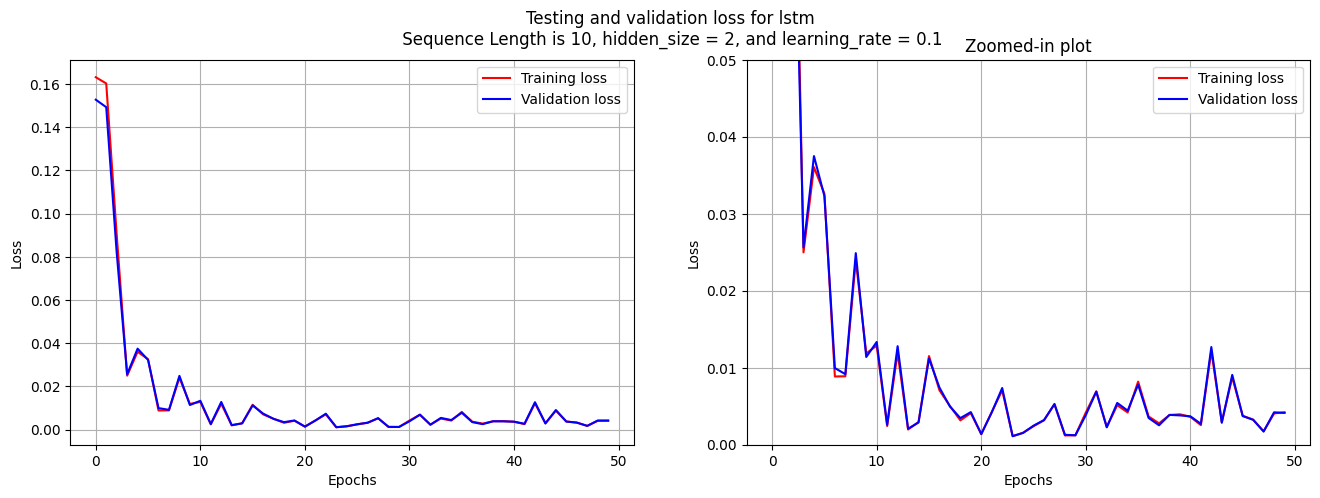


Training with seq_len=10, hidden_size=2, optimizer=adam, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.163975
Test  Avg loss: 0.153536
Epoch 2 -------------------
Train Avg loss: 0.163959
Test  Avg loss: 0.152152
Epoch 3 -------------------
Train Avg loss: 0.025973
Test  Avg loss: 0.023831
Epoch 4 -------------------
Train Avg loss: 0.004731
Test  Avg loss: 0.004553
Epoch 5 -------------------
Train Avg loss: 0.003147
Test  Avg loss: 0.003048
Epoch 6 -------------------
Train Avg loss: 0.002533
Test  Avg loss: 0.002443
Epoch 7 -------------------
Train Avg loss: 0.001897
Test  Avg loss: 0.001820
Epoch 8 -------------------
Train Avg loss: 0.001578
Test  Avg loss: 0.001475
Epoch 9 -------------------
Train Avg loss: 0.001513
Test  Avg loss: 0.001419
Epoch 10 -------------------
Train Avg loss: 0.001134
Test  Avg loss: 0.001064
Epoch 11 -------------------
Train Avg loss: 0.001239
Test  Avg loss: 0.001196
Epoch 12 -------------------
Train Avg loss: 0.000886
Test  Avg

Train Avg loss: 0.000086
Test  Avg loss: 0.000083
Done!


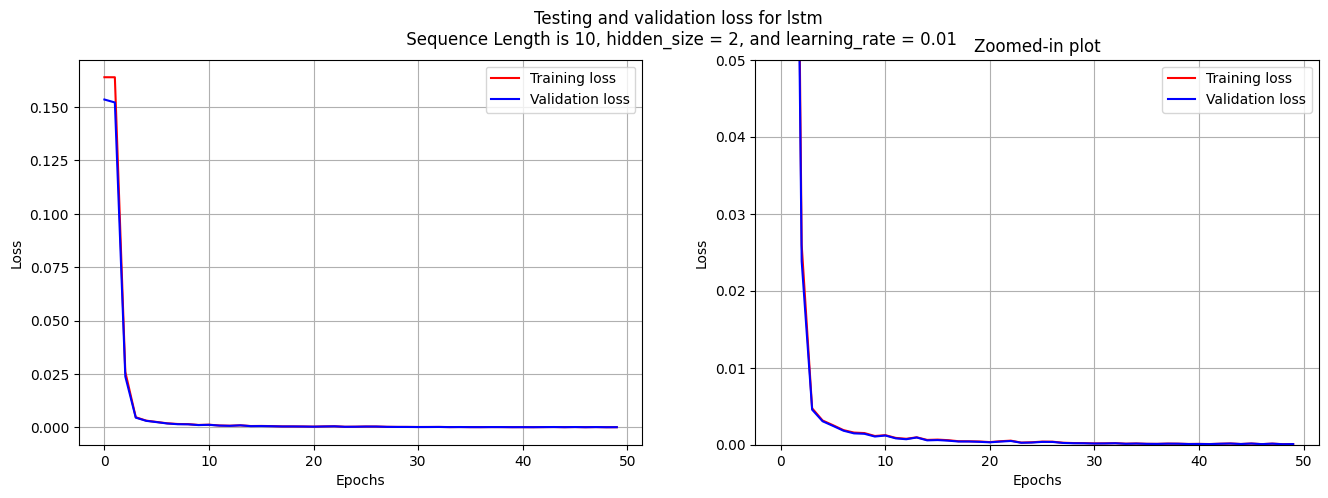


Training with seq_len=10, hidden_size=2, optimizer=adam, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 1.217036
Test  Avg loss: 1.191952
Epoch 2 -------------------
Train Avg loss: 0.598932
Test  Avg loss: 0.582229
Epoch 3 -------------------
Train Avg loss: 0.253558
Test  Avg loss: 0.239144
Epoch 4 -------------------
Train Avg loss: 0.173424
Test  Avg loss: 0.160765
Epoch 5 -------------------
Train Avg loss: 0.164675
Test  Avg loss: 0.153320
Epoch 6 -------------------
Train Avg loss: 0.163925
Test  Avg loss: 0.152694
Epoch 7 -------------------
Train Avg loss: 0.163900
Test  Avg loss: 0.153250
Epoch 8 -------------------
Train Avg loss: 0.163635
Test  Avg loss: 0.152901
Epoch 9 -------------------
Train Avg loss: 0.163082
Test  Avg loss: 0.153377
Epoch 10 -------------------
Train Avg loss: 0.162961
Test  Avg loss: 0.152374
Epoch 11 -------------------
Train Avg loss: 0.162624
Test  Avg loss: 0.152991
Epoch 12 -------------------
Train Avg loss: 0.162022
Test  Av

Train Avg loss: 0.003124
Test  Avg loss: 0.003051
Done!


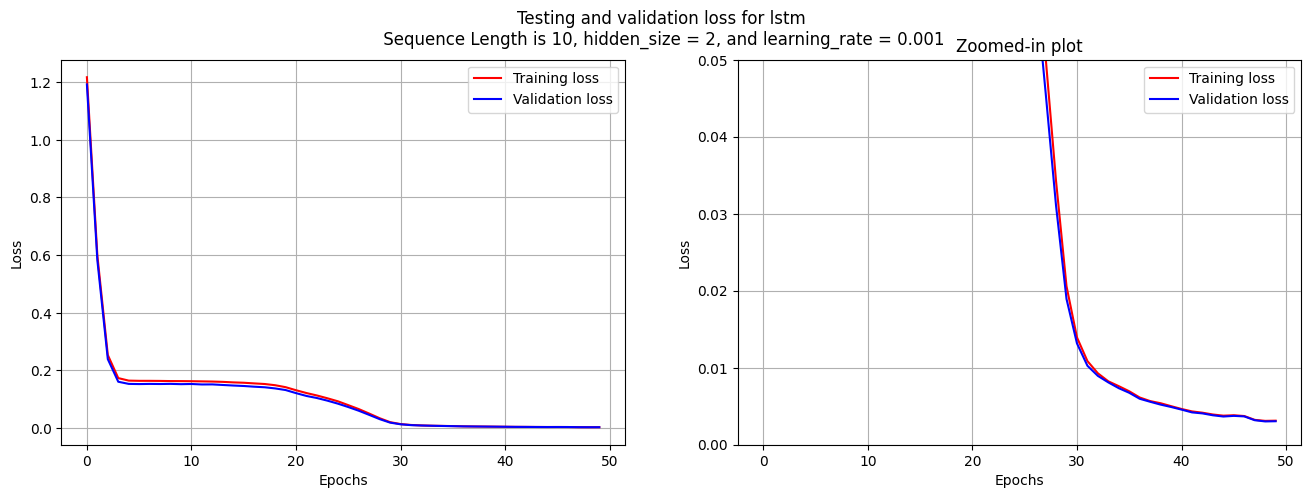


Training with seq_len=10, hidden_size=5, optimizer=sgd, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.159796
Test  Avg loss: 0.149005
Epoch 2 -------------------
Train Avg loss: 0.175949
Test  Avg loss: 0.163757
Epoch 3 -------------------
Train Avg loss: 0.133586
Test  Avg loss: 0.123709
Epoch 4 -------------------
Train Avg loss: 0.132368
Test  Avg loss: 0.122882
Epoch 5 -------------------
Train Avg loss: 0.103509
Test  Avg loss: 0.095588
Epoch 6 -------------------
Train Avg loss: 0.122662
Test  Avg loss: 0.116168
Epoch 7 -------------------
Train Avg loss: 0.071312
Test  Avg loss: 0.068248
Epoch 8 -------------------
Train Avg loss: 0.013255
Test  Avg loss: 0.012038
Epoch 9 -------------------
Train Avg loss: 0.007963
Test  Avg loss: 0.007556
Epoch 10 -------------------
Train Avg loss: 0.006011
Test  Avg loss: 0.005754
Epoch 11 -------------------
Train Avg loss: 0.005069
Test  Avg loss: 0.004936
Epoch 12 -------------------
Train Avg loss: 0.005526
Test  Avg l

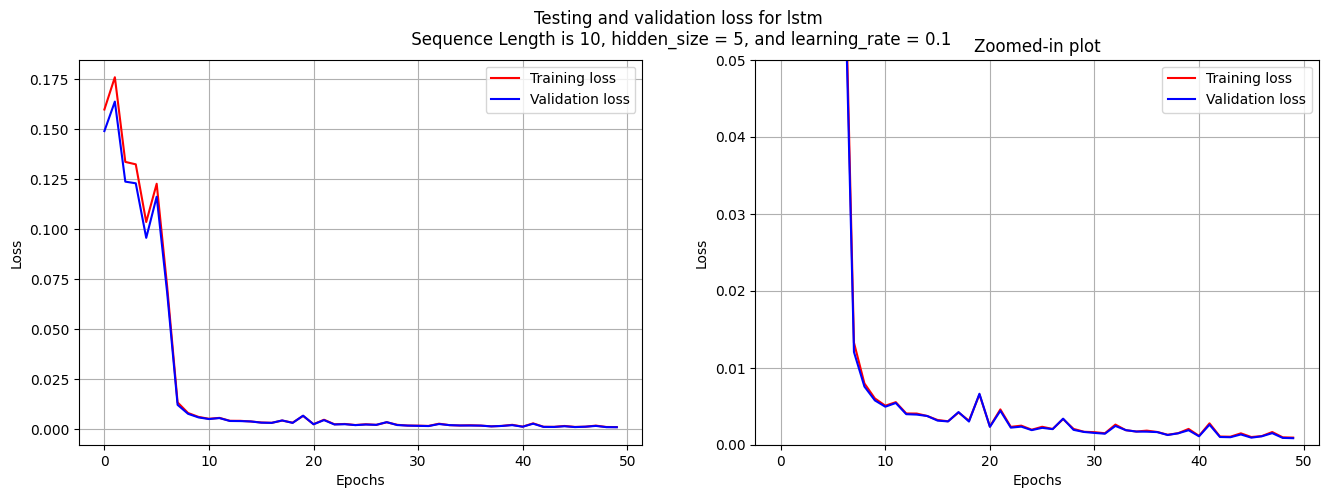


Training with seq_len=10, hidden_size=5, optimizer=sgd, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.167613
Test  Avg loss: 0.156757
Epoch 2 -------------------
Train Avg loss: 0.166909
Test  Avg loss: 0.156024
Epoch 3 -------------------
Train Avg loss: 0.166676
Test  Avg loss: 0.156128
Epoch 4 -------------------
Train Avg loss: 0.166421
Test  Avg loss: 0.157357
Epoch 5 -------------------
Train Avg loss: 0.165971
Test  Avg loss: 0.155343
Epoch 6 -------------------
Train Avg loss: 0.165780
Test  Avg loss: 0.155982
Epoch 7 -------------------
Train Avg loss: 0.165675
Test  Avg loss: 0.155200
Epoch 8 -------------------
Train Avg loss: 0.165012
Test  Avg loss: 0.153888
Epoch 9 -------------------
Train Avg loss: 0.165225
Test  Avg loss: 0.155267
Epoch 10 -------------------
Train Avg loss: 0.165088
Test  Avg loss: 0.155595
Epoch 11 -------------------
Train Avg loss: 0.164884
Test  Avg loss: 0.154456
Epoch 12 -------------------
Train Avg loss: 0.164219
Test  Avg 

Train Avg loss: 0.150710
Test  Avg loss: 0.139252
Done!


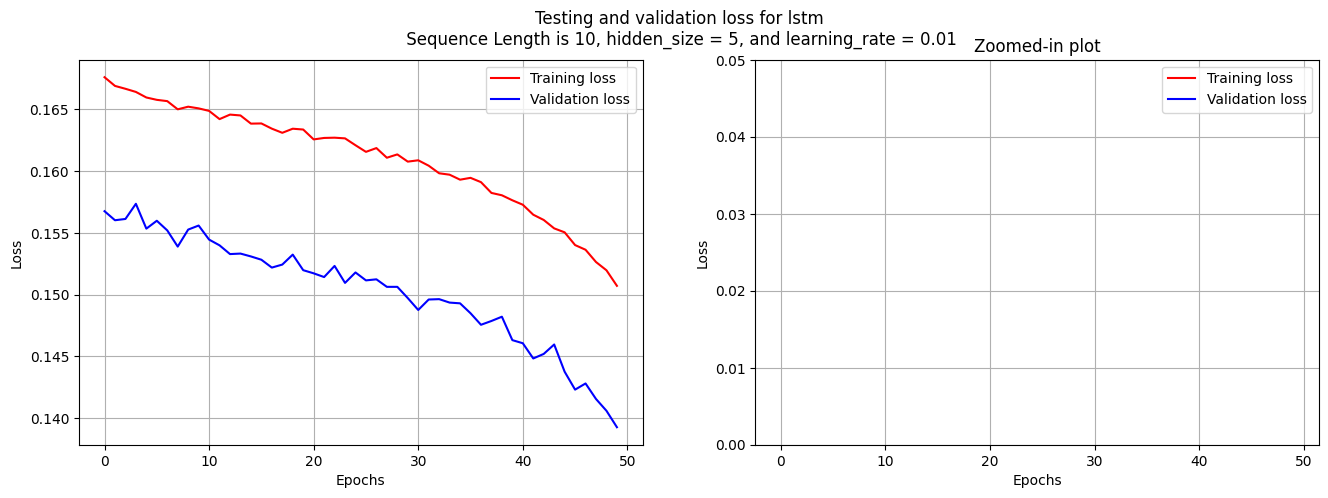


Training with seq_len=10, hidden_size=5, optimizer=sgd, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.868426
Test  Avg loss: 0.849459
Epoch 2 -------------------
Train Avg loss: 0.445529
Test  Avg loss: 0.427798
Epoch 3 -------------------
Train Avg loss: 0.275802
Test  Avg loss: 0.261416
Epoch 4 -------------------
Train Avg loss: 0.209668
Test  Avg loss: 0.196887
Epoch 5 -------------------
Train Avg loss: 0.183985
Test  Avg loss: 0.172439
Epoch 6 -------------------
Train Avg loss: 0.175109
Test  Avg loss: 0.164592
Epoch 7 -------------------
Train Avg loss: 0.172014
Test  Avg loss: 0.159154
Epoch 8 -------------------
Train Avg loss: 0.170562
Test  Avg loss: 0.158712
Epoch 9 -------------------
Train Avg loss: 0.170165
Test  Avg loss: 0.158341
Epoch 10 -------------------
Train Avg loss: 0.169682
Test  Avg loss: 0.159575
Epoch 11 -------------------
Train Avg loss: 0.169401
Test  Avg loss: 0.158094
Epoch 12 -------------------
Train Avg loss: 0.169087
Test  Avg

Train Avg loss: 0.166704
Test  Avg loss: 0.155764
Done!


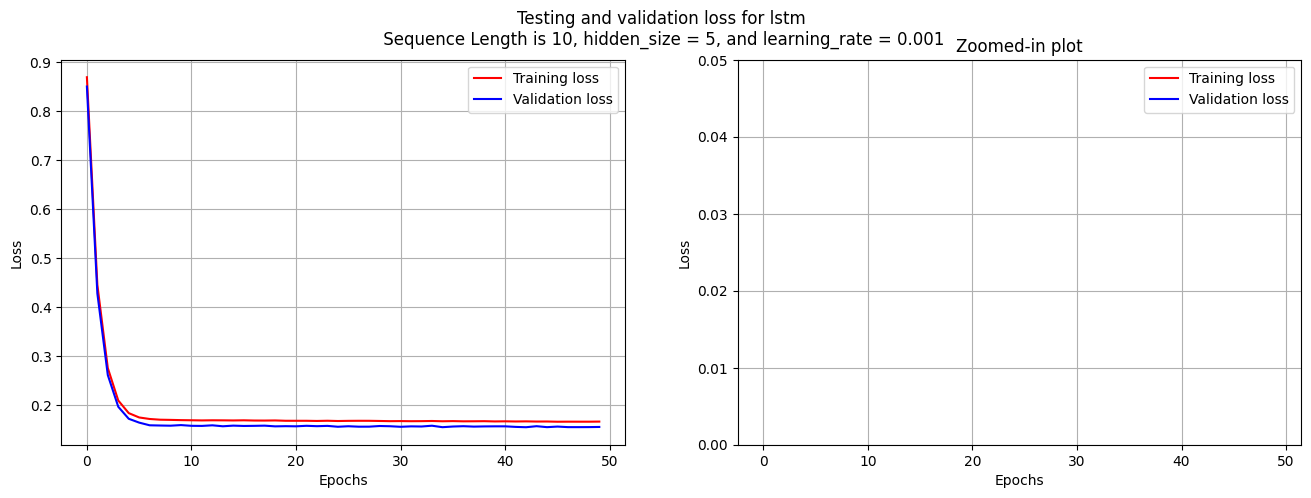


Training with seq_len=10, hidden_size=5, optimizer=adam, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.146775
Test  Avg loss: 0.137459
Epoch 2 -------------------
Train Avg loss: 0.006743
Test  Avg loss: 0.006553
Epoch 3 -------------------
Train Avg loss: 0.002359
Test  Avg loss: 0.002216
Epoch 4 -------------------
Train Avg loss: 0.002572
Test  Avg loss: 0.002443
Epoch 5 -------------------
Train Avg loss: 0.001496
Test  Avg loss: 0.001415
Epoch 6 -------------------
Train Avg loss: 0.001474
Test  Avg loss: 0.001485
Epoch 7 -------------------
Train Avg loss: 0.001134
Test  Avg loss: 0.001189
Epoch 8 -------------------
Train Avg loss: 0.001190
Test  Avg loss: 0.001127
Epoch 9 -------------------
Train Avg loss: 0.000615
Test  Avg loss: 0.000644
Epoch 10 -------------------
Train Avg loss: 0.000459
Test  Avg loss: 0.000469
Epoch 11 -------------------
Train Avg loss: 0.000665
Test  Avg loss: 0.000641
Epoch 12 -------------------
Train Avg loss: 0.002723
Test  Avg 

Train Avg loss: 0.001317
Test  Avg loss: 0.001338
Done!


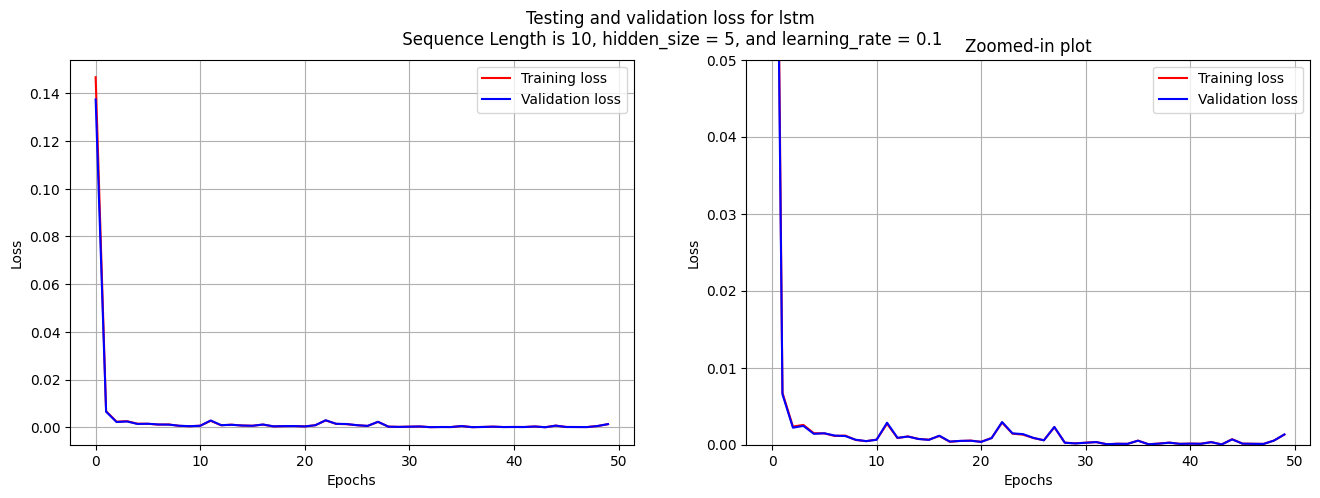


Training with seq_len=10, hidden_size=5, optimizer=adam, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.163529
Test  Avg loss: 0.154193
Epoch 2 -------------------
Train Avg loss: 0.160304
Test  Avg loss: 0.149397
Epoch 3 -------------------
Train Avg loss: 0.089488
Test  Avg loss: 0.085946
Epoch 4 -------------------
Train Avg loss: 0.004681
Test  Avg loss: 0.004961
Epoch 5 -------------------
Train Avg loss: 0.002066
Test  Avg loss: 0.002161
Epoch 6 -------------------
Train Avg loss: 0.001662
Test  Avg loss: 0.001707
Epoch 7 -------------------
Train Avg loss: 0.000925
Test  Avg loss: 0.000903
Epoch 8 -------------------
Train Avg loss: 0.000736
Test  Avg loss: 0.000720
Epoch 9 -------------------
Train Avg loss: 0.001042
Test  Avg loss: 0.001048
Epoch 10 -------------------
Train Avg loss: 0.000486
Test  Avg loss: 0.000460
Epoch 11 -------------------
Train Avg loss: 0.000637
Test  Avg loss: 0.000635
Epoch 12 -------------------
Train Avg loss: 0.000354
Test  Avg

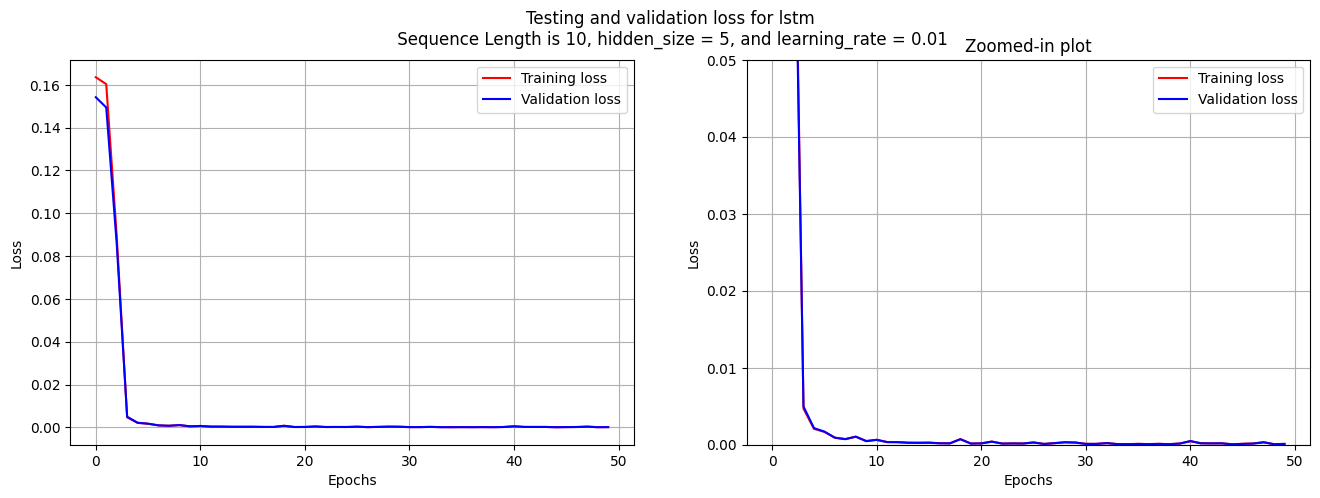


Training with seq_len=10, hidden_size=5, optimizer=adam, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.161528
Test  Avg loss: 0.151443
Epoch 2 -------------------
Train Avg loss: 0.159508
Test  Avg loss: 0.149262
Epoch 3 -------------------
Train Avg loss: 0.156341
Test  Avg loss: 0.145372
Epoch 4 -------------------
Train Avg loss: 0.128917
Test  Avg loss: 0.119847
Epoch 5 -------------------
Train Avg loss: 0.108771
Test  Avg loss: 0.100124
Epoch 6 -------------------
Train Avg loss: 0.082945
Test  Avg loss: 0.078299
Epoch 7 -------------------
Train Avg loss: 0.054392
Test  Avg loss: 0.052520
Epoch 8 -------------------
Train Avg loss: 0.029070
Test  Avg loss: 0.028756
Epoch 9 -------------------
Train Avg loss: 0.015088
Test  Avg loss: 0.014451
Epoch 10 -------------------
Train Avg loss: 0.010059
Test  Avg loss: 0.009891
Epoch 11 -------------------
Train Avg loss: 0.007319
Test  Avg loss: 0.007190
Epoch 12 -------------------
Train Avg loss: 0.005837
Test  Av

Train Avg loss: 0.000400
Test  Avg loss: 0.000416
Done!


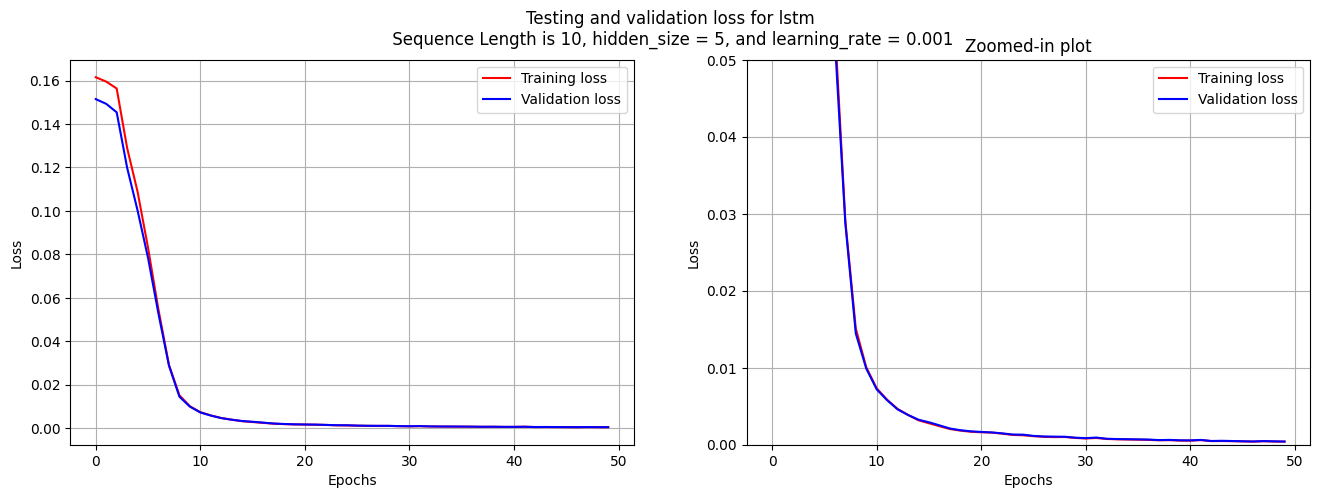


Training with seq_len=25, hidden_size=2, optimizer=sgd, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.170746
Test  Avg loss: 0.165550
Epoch 2 -------------------
Train Avg loss: 0.169251
Test  Avg loss: 0.164079
Epoch 3 -------------------
Train Avg loss: 0.168928
Test  Avg loss: 0.163124
Epoch 4 -------------------
Train Avg loss: 0.168620
Test  Avg loss: 0.163685
Epoch 5 -------------------
Train Avg loss: 0.168236
Test  Avg loss: 0.163194
Epoch 6 -------------------
Train Avg loss: 0.173505
Test  Avg loss: 0.168270
Epoch 7 -------------------
Train Avg loss: 0.170180
Test  Avg loss: 0.166557
Epoch 8 -------------------
Train Avg loss: 0.168929
Test  Avg loss: 0.163020
Epoch 9 -------------------
Train Avg loss: 0.168836
Test  Avg loss: 0.164742
Epoch 10 -------------------
Train Avg loss: 0.168586
Test  Avg loss: 0.163639
Epoch 11 -------------------
Train Avg loss: 0.169044
Test  Avg loss: 0.163899
Epoch 12 -------------------
Train Avg loss: 0.168025
Test  Avg l

Train Avg loss: 0.167617
Test  Avg loss: 0.163734
Done!


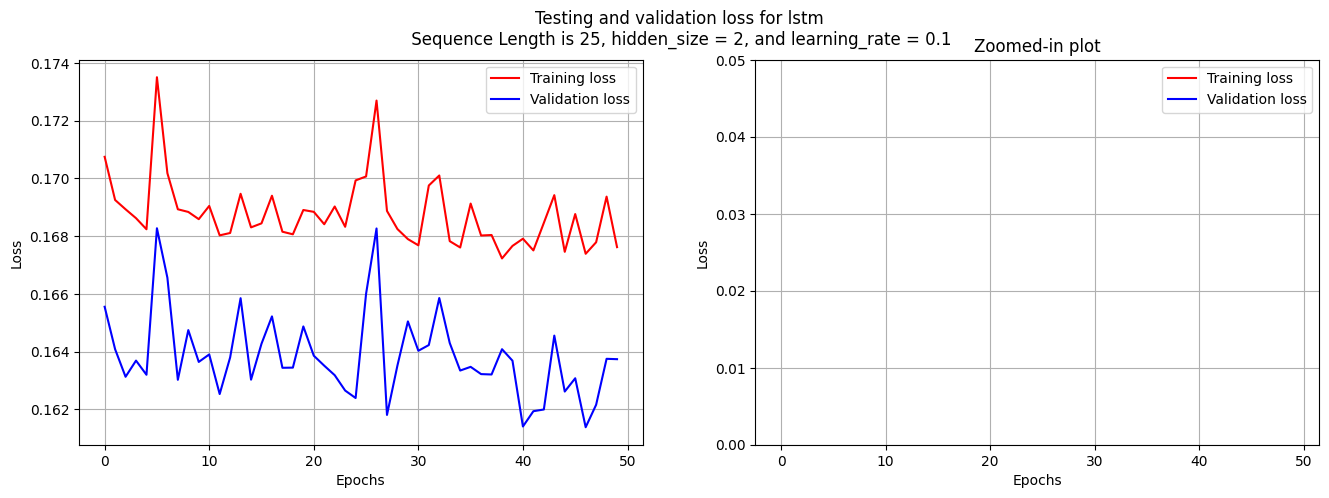


Training with seq_len=25, hidden_size=2, optimizer=sgd, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.168433
Test  Avg loss: 0.162520
Epoch 2 -------------------
Train Avg loss: 0.167383
Test  Avg loss: 0.162261
Epoch 3 -------------------
Train Avg loss: 0.167814
Test  Avg loss: 0.163614
Epoch 4 -------------------
Train Avg loss: 0.167746
Test  Avg loss: 0.164446
Epoch 5 -------------------
Train Avg loss: 0.167883
Test  Avg loss: 0.162169
Epoch 6 -------------------
Train Avg loss: 0.167873
Test  Avg loss: 0.162204
Epoch 7 -------------------
Train Avg loss: 0.167404
Test  Avg loss: 0.164701
Epoch 8 -------------------
Train Avg loss: 0.167914
Test  Avg loss: 0.163538
Epoch 9 -------------------
Train Avg loss: 0.168088
Test  Avg loss: 0.163089
Epoch 10 -------------------
Train Avg loss: 0.167778
Test  Avg loss: 0.162867
Epoch 11 -------------------
Train Avg loss: 0.167429
Test  Avg loss: 0.164074
Epoch 12 -------------------
Train Avg loss: 0.167545
Test  Avg 

Train Avg loss: 0.167340
Test  Avg loss: 0.162662
Done!


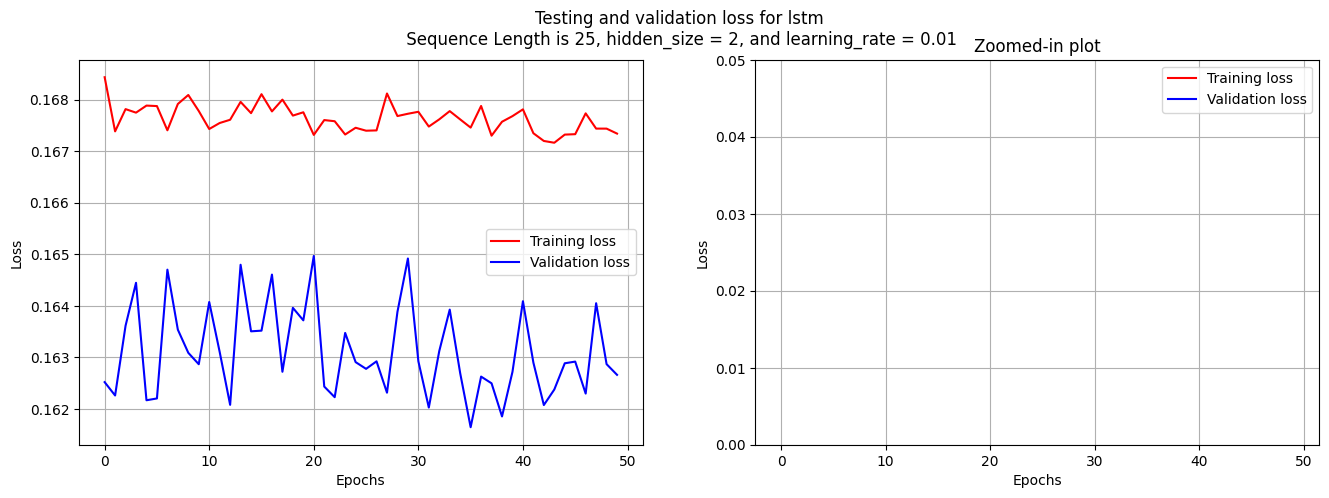


Training with seq_len=25, hidden_size=2, optimizer=sgd, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 1.311936
Test  Avg loss: 1.293110
Epoch 2 -------------------
Train Avg loss: 0.683907
Test  Avg loss: 0.674288
Epoch 3 -------------------
Train Avg loss: 0.390882
Test  Avg loss: 0.382923
Epoch 4 -------------------
Train Avg loss: 0.260929
Test  Avg loss: 0.252511
Epoch 5 -------------------
Train Avg loss: 0.205787
Test  Avg loss: 0.198917
Epoch 6 -------------------
Train Avg loss: 0.182861
Test  Avg loss: 0.179243
Epoch 7 -------------------
Train Avg loss: 0.174009
Test  Avg loss: 0.166740
Epoch 8 -------------------
Train Avg loss: 0.170579
Test  Avg loss: 0.164895
Epoch 9 -------------------
Train Avg loss: 0.168729
Test  Avg loss: 0.162894
Epoch 10 -------------------
Train Avg loss: 0.169029
Test  Avg loss: 0.161965
Epoch 11 -------------------
Train Avg loss: 0.168003
Test  Avg loss: 0.163877
Epoch 12 -------------------
Train Avg loss: 0.168330
Test  Avg

Train Avg loss: 0.167778
Test  Avg loss: 0.162610
Done!


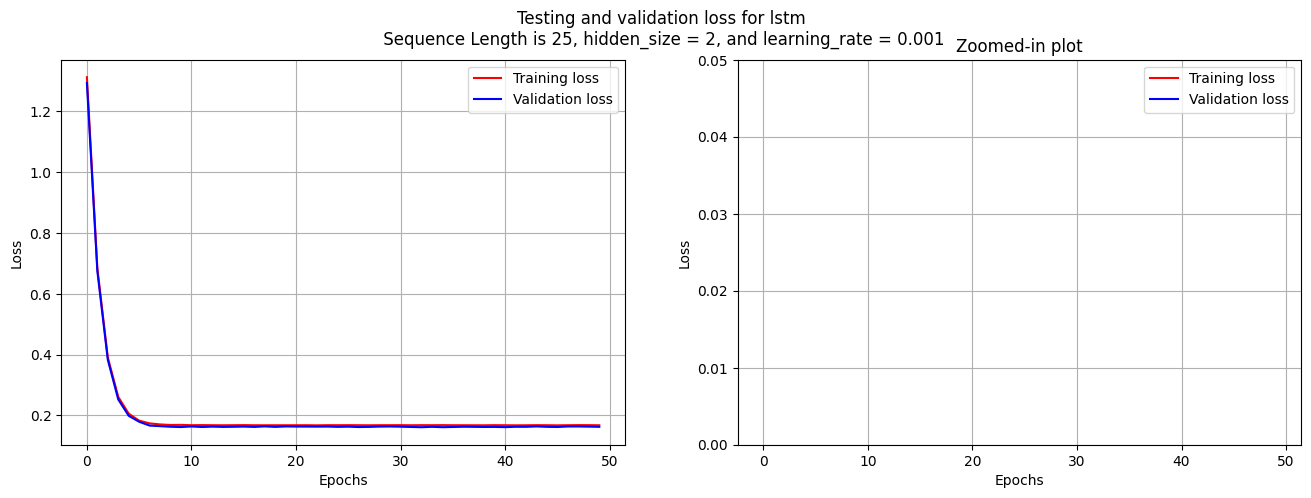


Training with seq_len=25, hidden_size=2, optimizer=adam, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.166936
Test  Avg loss: 0.163343
Epoch 2 -------------------
Train Avg loss: 0.013606
Test  Avg loss: 0.014779
Epoch 3 -------------------
Train Avg loss: 0.004887
Test  Avg loss: 0.005373
Epoch 4 -------------------
Train Avg loss: 0.006028
Test  Avg loss: 0.006746
Epoch 5 -------------------
Train Avg loss: 0.001981
Test  Avg loss: 0.002295
Epoch 6 -------------------
Train Avg loss: 0.001560
Test  Avg loss: 0.001730
Epoch 7 -------------------
Train Avg loss: 0.000388
Test  Avg loss: 0.000353
Epoch 8 -------------------
Train Avg loss: 0.000159
Test  Avg loss: 0.000166
Epoch 9 -------------------
Train Avg loss: 0.000524
Test  Avg loss: 0.000483
Epoch 10 -------------------
Train Avg loss: 0.000504
Test  Avg loss: 0.000552
Epoch 11 -------------------
Train Avg loss: 0.000107
Test  Avg loss: 0.000103
Epoch 12 -------------------
Train Avg loss: 0.000259
Test  Avg 

Train Avg loss: 0.000157
Test  Avg loss: 0.000164
Done!


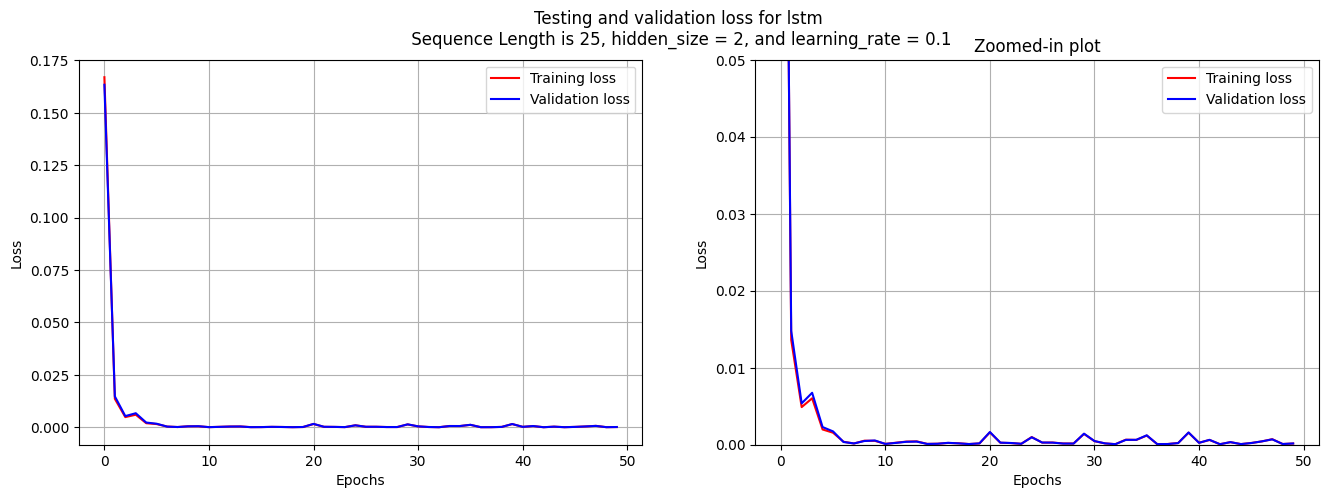


Training with seq_len=25, hidden_size=2, optimizer=adam, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.168235
Test  Avg loss: 0.162696
Epoch 2 -------------------
Train Avg loss: 0.103537
Test  Avg loss: 0.102470
Epoch 3 -------------------
Train Avg loss: 0.010602
Test  Avg loss: 0.012289
Epoch 4 -------------------
Train Avg loss: 0.004717
Test  Avg loss: 0.005443
Epoch 5 -------------------
Train Avg loss: 0.002691
Test  Avg loss: 0.003093
Epoch 6 -------------------
Train Avg loss: 0.002033
Test  Avg loss: 0.002198
Epoch 7 -------------------
Train Avg loss: 0.001422
Test  Avg loss: 0.001578
Epoch 8 -------------------
Train Avg loss: 0.001117
Test  Avg loss: 0.001272
Epoch 9 -------------------
Train Avg loss: 0.001386
Test  Avg loss: 0.001531
Epoch 10 -------------------
Train Avg loss: 0.001004
Test  Avg loss: 0.001053
Epoch 11 -------------------
Train Avg loss: 0.001332
Test  Avg loss: 0.001432
Epoch 12 -------------------
Train Avg loss: 0.001085
Test  Avg

Train Avg loss: 0.000147
Test  Avg loss: 0.000154
Done!


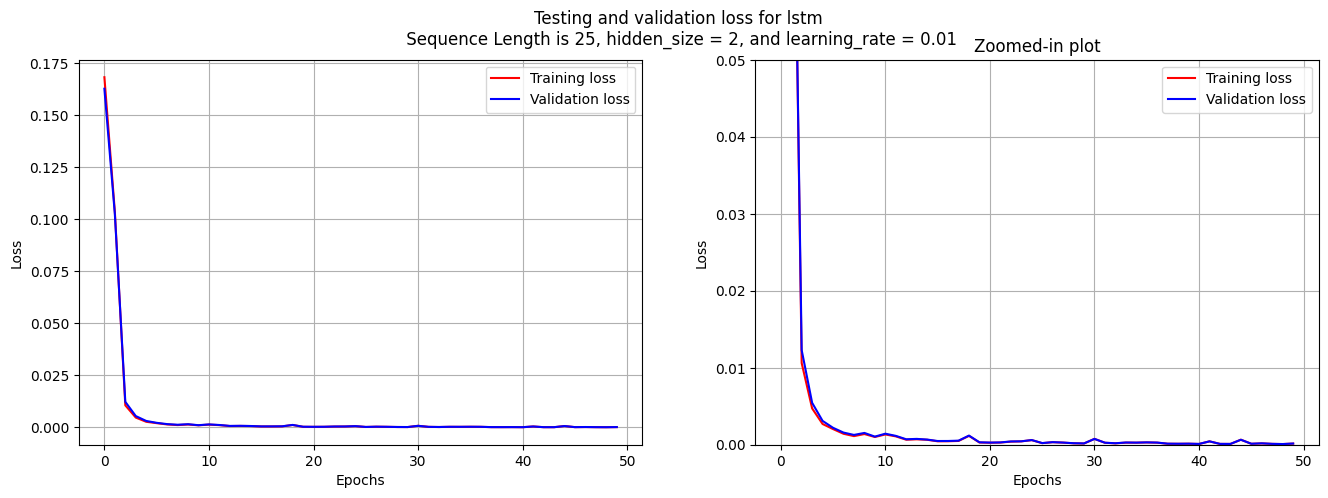


Training with seq_len=25, hidden_size=2, optimizer=adam, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 1.210617
Test  Avg loss: 1.190756
Epoch 2 -------------------
Train Avg loss: 0.328174
Test  Avg loss: 0.321539
Epoch 3 -------------------
Train Avg loss: 0.179204
Test  Avg loss: 0.175072
Epoch 4 -------------------
Train Avg loss: 0.167726
Test  Avg loss: 0.163073
Epoch 5 -------------------
Train Avg loss: 0.166994
Test  Avg loss: 0.162069
Epoch 6 -------------------
Train Avg loss: 0.166818
Test  Avg loss: 0.162357
Epoch 7 -------------------
Train Avg loss: 0.167221
Test  Avg loss: 0.161767
Epoch 8 -------------------
Train Avg loss: 0.166579
Test  Avg loss: 0.161880
Epoch 9 -------------------
Train Avg loss: 0.166926
Test  Avg loss: 0.162301
Epoch 10 -------------------
Train Avg loss: 0.166597
Test  Avg loss: 0.163214
Epoch 11 -------------------
Train Avg loss: 0.166812
Test  Avg loss: 0.164025
Epoch 12 -------------------
Train Avg loss: 0.166706
Test  Av

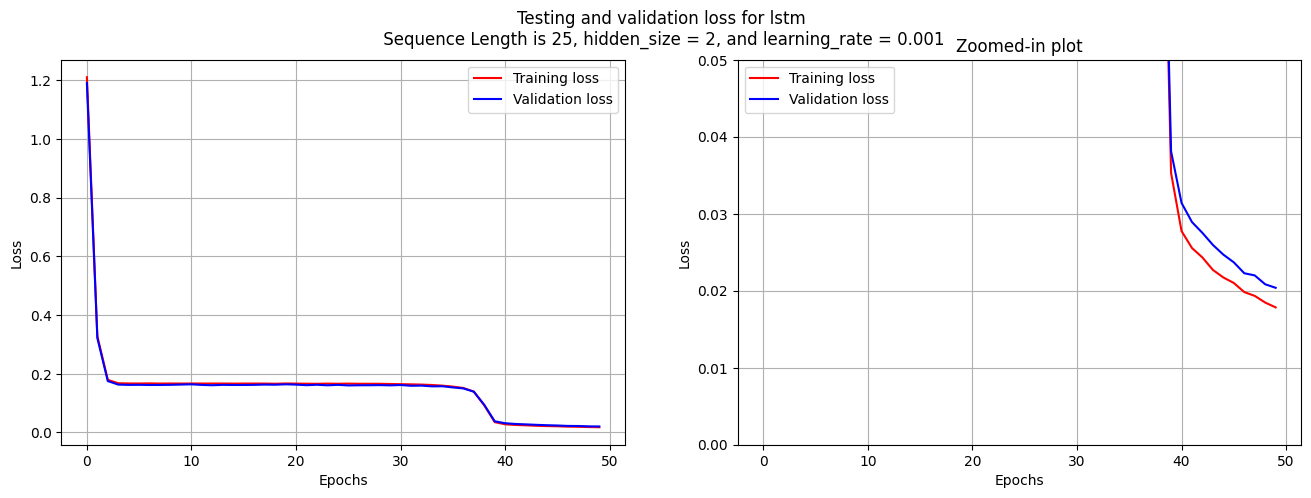


Training with seq_len=25, hidden_size=5, optimizer=sgd, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.168571
Test  Avg loss: 0.162805
Epoch 2 -------------------
Train Avg loss: 0.167414
Test  Avg loss: 0.162675
Epoch 3 -------------------
Train Avg loss: 0.167682
Test  Avg loss: 0.162286
Epoch 4 -------------------
Train Avg loss: 0.168808
Test  Avg loss: 0.165694
Epoch 5 -------------------
Train Avg loss: 0.167892
Test  Avg loss: 0.162815
Epoch 6 -------------------
Train Avg loss: 0.168170
Test  Avg loss: 0.164782
Epoch 7 -------------------
Train Avg loss: 0.166420
Test  Avg loss: 0.161868
Epoch 8 -------------------
Train Avg loss: 0.166437
Test  Avg loss: 0.162768
Epoch 9 -------------------
Train Avg loss: 0.167712
Test  Avg loss: 0.161996
Epoch 10 -------------------
Train Avg loss: 0.165754
Test  Avg loss: 0.162016
Epoch 11 -------------------
Train Avg loss: 0.165711
Test  Avg loss: 0.161253
Epoch 12 -------------------
Train Avg loss: 0.165687
Test  Avg l

Train Avg loss: 0.004941
Test  Avg loss: 0.005458
Done!


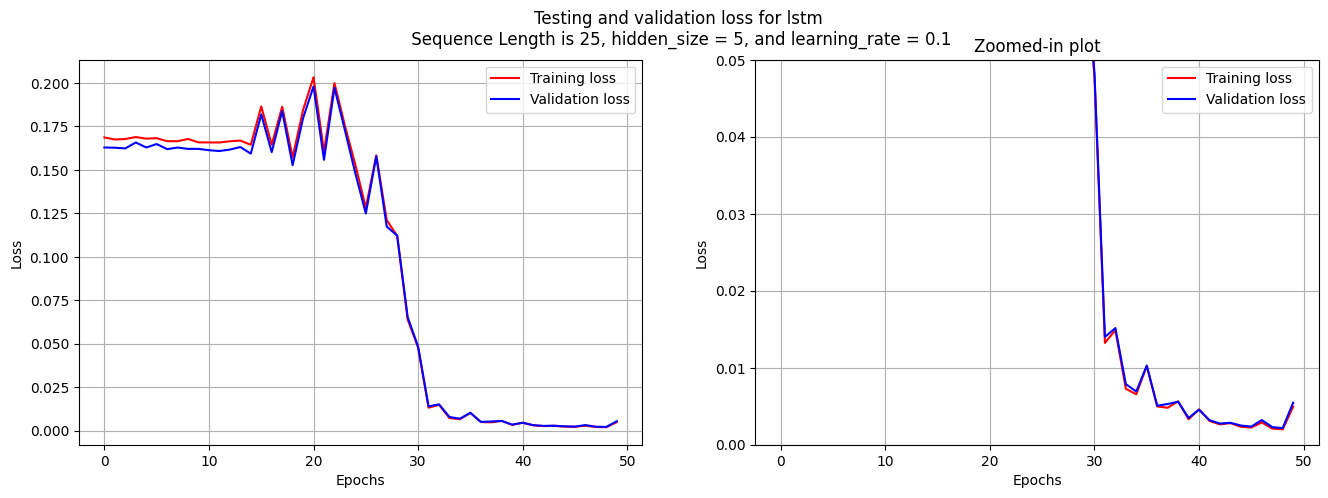


Training with seq_len=25, hidden_size=5, optimizer=sgd, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.167040
Test  Avg loss: 0.162235
Epoch 2 -------------------
Train Avg loss: 0.166459
Test  Avg loss: 0.161025
Epoch 3 -------------------
Train Avg loss: 0.167008
Test  Avg loss: 0.162367
Epoch 4 -------------------
Train Avg loss: 0.166644
Test  Avg loss: 0.161299
Epoch 5 -------------------
Train Avg loss: 0.166212
Test  Avg loss: 0.162356
Epoch 6 -------------------
Train Avg loss: 0.166829
Test  Avg loss: 0.161615
Epoch 7 -------------------
Train Avg loss: 0.166087
Test  Avg loss: 0.160985
Epoch 8 -------------------
Train Avg loss: 0.165965
Test  Avg loss: 0.161662
Epoch 9 -------------------
Train Avg loss: 0.166128
Test  Avg loss: 0.160591
Epoch 10 -------------------
Train Avg loss: 0.165775
Test  Avg loss: 0.161284
Epoch 11 -------------------
Train Avg loss: 0.165511
Test  Avg loss: 0.161738
Epoch 12 -------------------
Train Avg loss: 0.165448
Test  Avg 

Train Avg loss: 0.153191
Test  Avg loss: 0.147772
Done!


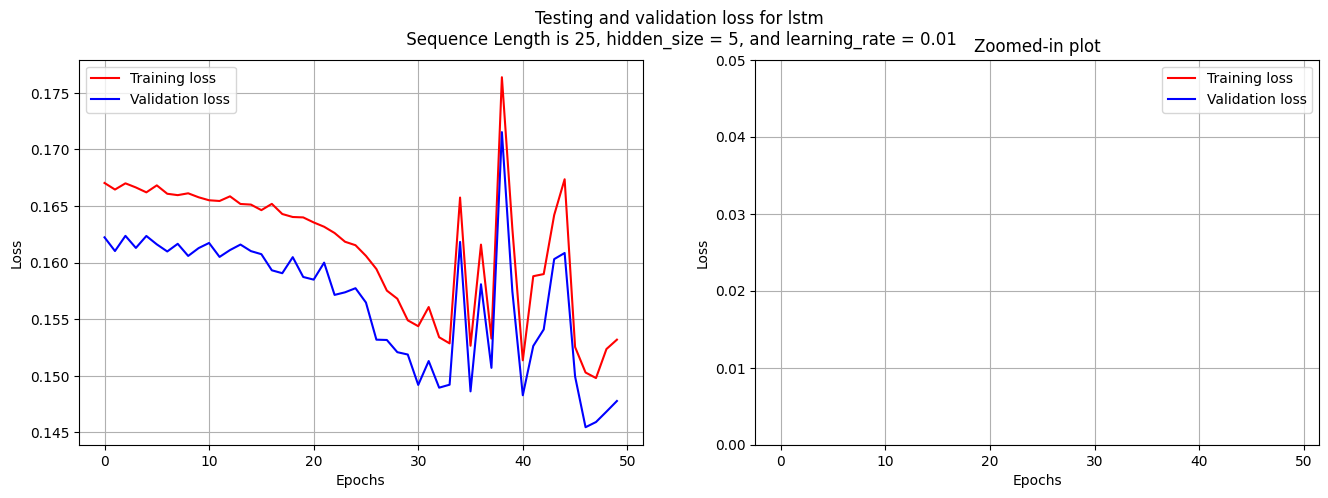


Training with seq_len=25, hidden_size=5, optimizer=sgd, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.992675
Test  Avg loss: 0.981300
Epoch 2 -------------------
Train Avg loss: 0.527622
Test  Avg loss: 0.516818
Epoch 3 -------------------
Train Avg loss: 0.322137
Test  Avg loss: 0.316432
Epoch 4 -------------------
Train Avg loss: 0.232763
Test  Avg loss: 0.224664
Epoch 5 -------------------
Train Avg loss: 0.195129
Test  Avg loss: 0.190079
Epoch 6 -------------------
Train Avg loss: 0.179320
Test  Avg loss: 0.174128
Epoch 7 -------------------
Train Avg loss: 0.173058
Test  Avg loss: 0.167255
Epoch 8 -------------------
Train Avg loss: 0.170361
Test  Avg loss: 0.164977
Epoch 9 -------------------
Train Avg loss: 0.169456
Test  Avg loss: 0.163372
Epoch 10 -------------------
Train Avg loss: 0.169016
Test  Avg loss: 0.163604
Epoch 11 -------------------
Train Avg loss: 0.169133
Test  Avg loss: 0.163115
Epoch 12 -------------------
Train Avg loss: 0.168974
Test  Avg

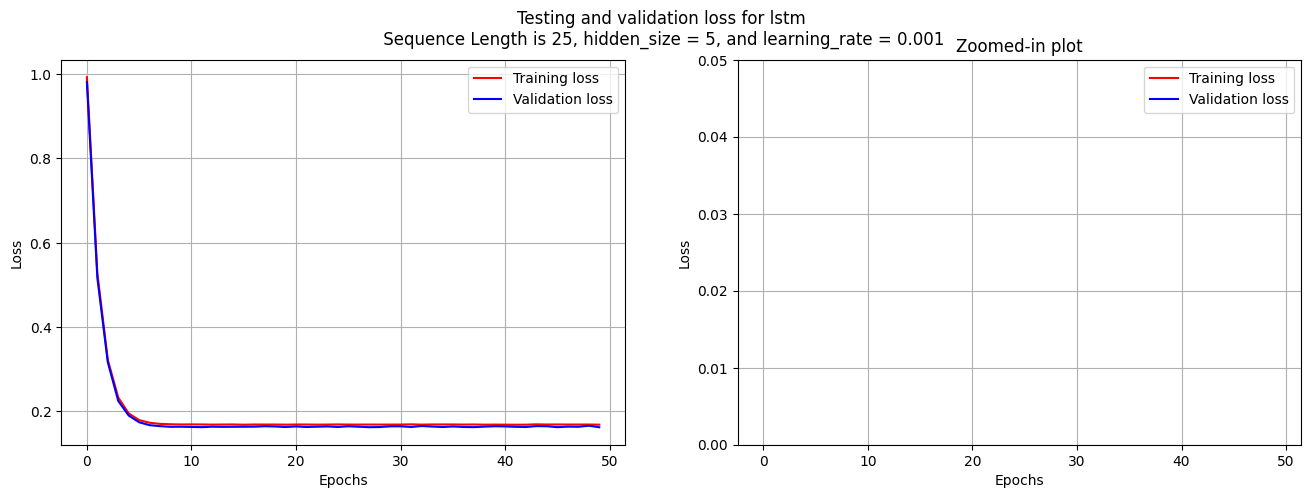


Training with seq_len=25, hidden_size=5, optimizer=adam, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.167850
Test  Avg loss: 0.163850
Epoch 2 -------------------
Train Avg loss: 0.161751
Test  Avg loss: 0.158177
Epoch 3 -------------------
Train Avg loss: 0.004065
Test  Avg loss: 0.004081
Epoch 4 -------------------
Train Avg loss: 0.002587
Test  Avg loss: 0.002641
Epoch 5 -------------------
Train Avg loss: 0.000647
Test  Avg loss: 0.000656
Epoch 6 -------------------
Train Avg loss: 0.000406
Test  Avg loss: 0.000419
Epoch 7 -------------------
Train Avg loss: 0.000396
Test  Avg loss: 0.000463
Epoch 8 -------------------
Train Avg loss: 0.000573
Test  Avg loss: 0.000584
Epoch 9 -------------------
Train Avg loss: 0.000230
Test  Avg loss: 0.000238
Epoch 10 -------------------
Train Avg loss: 0.000319
Test  Avg loss: 0.000326
Epoch 11 -------------------
Train Avg loss: 0.000164
Test  Avg loss: 0.000181
Epoch 12 -------------------
Train Avg loss: 0.001893
Test  Avg 

Train Avg loss: 0.000096
Test  Avg loss: 0.000105
Done!


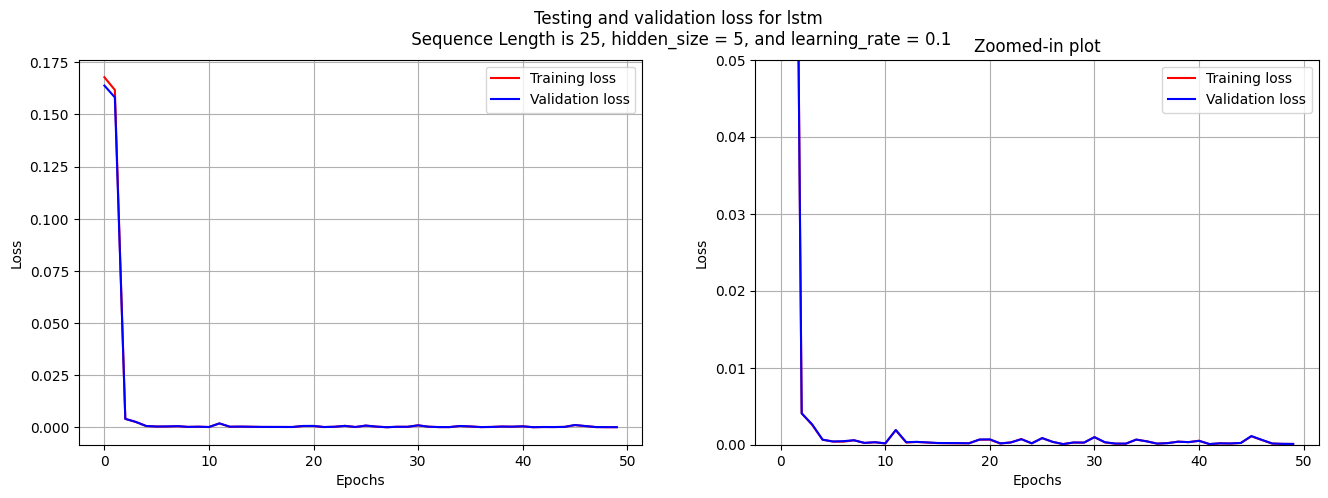


Training with seq_len=25, hidden_size=5, optimizer=adam, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.164182
Test  Avg loss: 0.160037
Epoch 2 -------------------
Train Avg loss: 0.151786
Test  Avg loss: 0.148320
Epoch 3 -------------------
Train Avg loss: 0.021667
Test  Avg loss: 0.024583
Epoch 4 -------------------
Train Avg loss: 0.004033
Test  Avg loss: 0.004827
Epoch 5 -------------------
Train Avg loss: 0.010132
Test  Avg loss: 0.010087
Epoch 6 -------------------
Train Avg loss: 0.004841
Test  Avg loss: 0.005439
Epoch 7 -------------------
Train Avg loss: 0.005257
Test  Avg loss: 0.005950
Epoch 8 -------------------
Train Avg loss: 0.001783
Test  Avg loss: 0.001981
Epoch 9 -------------------
Train Avg loss: 0.010134
Test  Avg loss: 0.010508
Epoch 10 -------------------
Train Avg loss: 0.001638
Test  Avg loss: 0.001855
Epoch 11 -------------------
Train Avg loss: 0.004354
Test  Avg loss: 0.004675
Epoch 12 -------------------
Train Avg loss: 0.012287
Test  Avg

Train Avg loss: 0.000262
Test  Avg loss: 0.000289
Done!


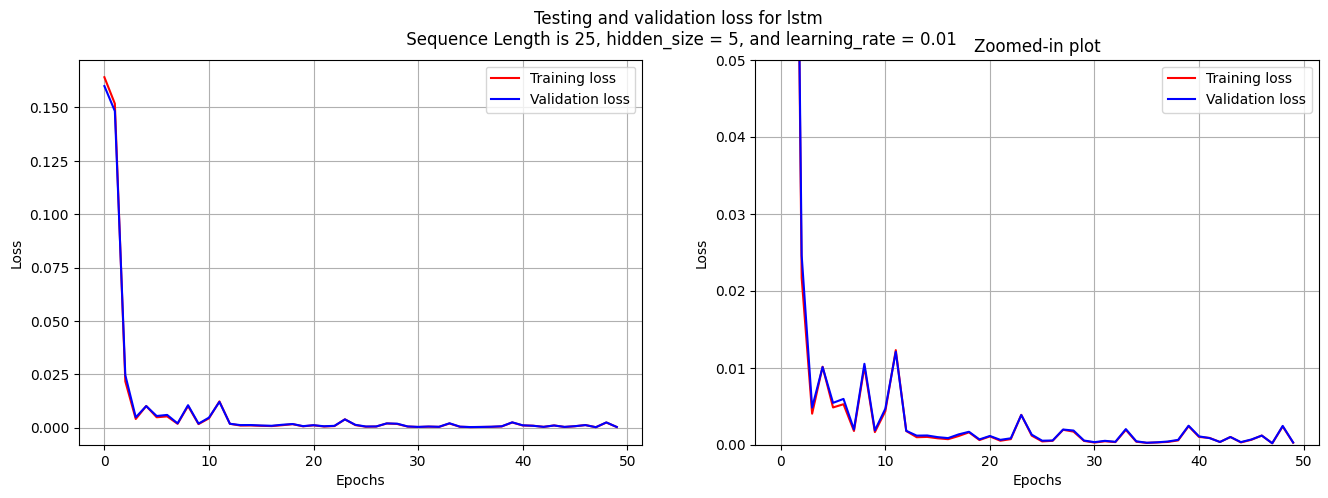


Training with seq_len=25, hidden_size=5, optimizer=adam, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.166968
Test  Avg loss: 0.163635
Epoch 2 -------------------
Train Avg loss: 0.166768
Test  Avg loss: 0.162481
Epoch 3 -------------------
Train Avg loss: 0.165832
Test  Avg loss: 0.162796
Epoch 4 -------------------
Train Avg loss: 0.163797
Test  Avg loss: 0.159956
Epoch 5 -------------------
Train Avg loss: 0.160935
Test  Avg loss: 0.156848
Epoch 6 -------------------
Train Avg loss: 0.151117
Test  Avg loss: 0.148520
Epoch 7 -------------------
Train Avg loss: 0.133768
Test  Avg loss: 0.131557
Epoch 8 -------------------
Train Avg loss: 0.101433
Test  Avg loss: 0.101469
Epoch 9 -------------------
Train Avg loss: 0.051618
Test  Avg loss: 0.052711
Epoch 10 -------------------
Train Avg loss: 0.034272
Test  Avg loss: 0.035274
Epoch 11 -------------------
Train Avg loss: 0.030982
Test  Avg loss: 0.031762
Epoch 12 -------------------
Train Avg loss: 0.023233
Test  Av

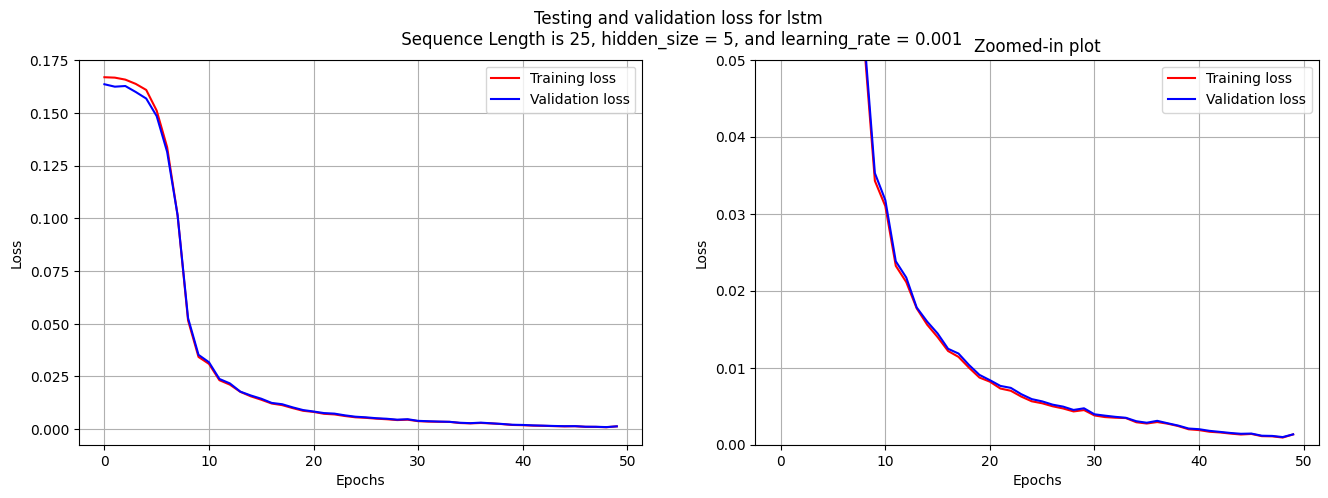


Training with seq_len=50, hidden_size=2, optimizer=sgd, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.167010
Test  Avg loss: 0.157201
Epoch 2 -------------------
Train Avg loss: 0.167667
Test  Avg loss: 0.158523
Epoch 3 -------------------
Train Avg loss: 0.166270
Test  Avg loss: 0.157106
Epoch 4 -------------------
Train Avg loss: 0.166789
Test  Avg loss: 0.155998
Epoch 5 -------------------
Train Avg loss: 0.166323
Test  Avg loss: 0.158539
Epoch 6 -------------------
Train Avg loss: 0.166756
Test  Avg loss: 0.156710
Epoch 7 -------------------
Train Avg loss: 0.166748
Test  Avg loss: 0.158672
Epoch 8 -------------------
Train Avg loss: 0.168833
Test  Avg loss: 0.159293
Epoch 9 -------------------
Train Avg loss: 0.166313
Test  Avg loss: 0.156734
Epoch 10 -------------------
Train Avg loss: 0.166275
Test  Avg loss: 0.158043
Epoch 11 -------------------
Train Avg loss: 0.168283
Test  Avg loss: 0.157348
Epoch 12 -------------------
Train Avg loss: 0.166102
Test  Avg l

Train Avg loss: 0.122687
Test  Avg loss: 0.114316
Done!


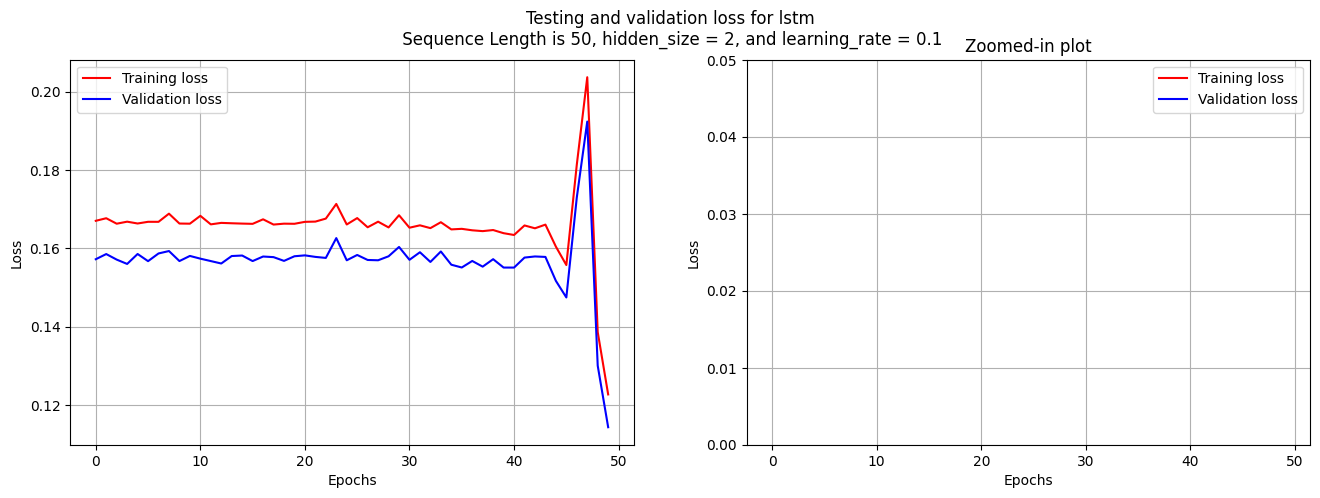


Training with seq_len=50, hidden_size=2, optimizer=sgd, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.167510
Test  Avg loss: 0.158628
Epoch 2 -------------------
Train Avg loss: 0.167106
Test  Avg loss: 0.159118
Epoch 3 -------------------
Train Avg loss: 0.166955
Test  Avg loss: 0.158971
Epoch 4 -------------------
Train Avg loss: 0.167196
Test  Avg loss: 0.158272
Epoch 5 -------------------
Train Avg loss: 0.167447
Test  Avg loss: 0.156946
Epoch 6 -------------------
Train Avg loss: 0.167278
Test  Avg loss: 0.158053
Epoch 7 -------------------
Train Avg loss: 0.166945
Test  Avg loss: 0.156123
Epoch 8 -------------------
Train Avg loss: 0.166993
Test  Avg loss: 0.156583
Epoch 9 -------------------
Train Avg loss: 0.167108
Test  Avg loss: 0.158678
Epoch 10 -------------------
Train Avg loss: 0.167153
Test  Avg loss: 0.158068
Epoch 11 -------------------
Train Avg loss: 0.166944
Test  Avg loss: 0.158442
Epoch 12 -------------------
Train Avg loss: 0.166764
Test  Avg 

Train Avg loss: 0.166575
Test  Avg loss: 0.159174
Done!


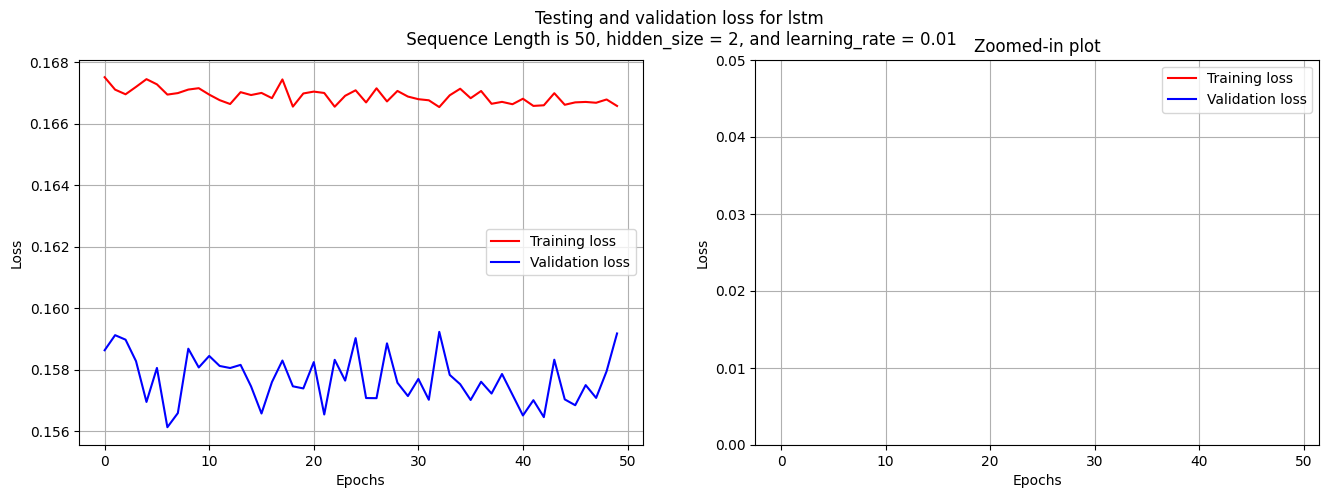


Training with seq_len=50, hidden_size=2, optimizer=sgd, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 1.343338
Test  Avg loss: 1.320755
Epoch 2 -------------------
Train Avg loss: 0.772329
Test  Avg loss: 0.753058
Epoch 3 -------------------
Train Avg loss: 0.477248
Test  Avg loss: 0.466073
Epoch 4 -------------------
Train Avg loss: 0.327379
Test  Avg loss: 0.313171
Epoch 5 -------------------
Train Avg loss: 0.249603
Test  Avg loss: 0.235079
Epoch 6 -------------------
Train Avg loss: 0.208882
Test  Avg loss: 0.197209
Epoch 7 -------------------
Train Avg loss: 0.188986
Test  Avg loss: 0.178892
Epoch 8 -------------------
Train Avg loss: 0.178186
Test  Avg loss: 0.167618
Epoch 9 -------------------
Train Avg loss: 0.172846
Test  Avg loss: 0.161479
Epoch 10 -------------------
Train Avg loss: 0.169695
Test  Avg loss: 0.159380
Epoch 11 -------------------
Train Avg loss: 0.168288
Test  Avg loss: 0.159496
Epoch 12 -------------------
Train Avg loss: 0.168041
Test  Avg

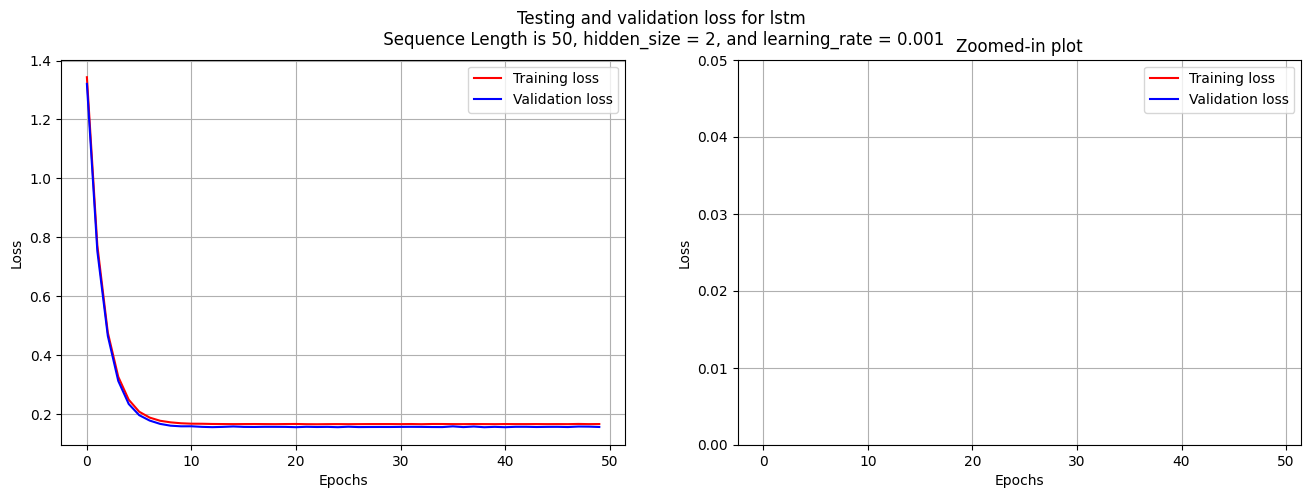


Training with seq_len=50, hidden_size=2, optimizer=adam, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.167605
Test  Avg loss: 0.158404
Epoch 2 -------------------
Train Avg loss: 0.010083
Test  Avg loss: 0.010188
Epoch 3 -------------------
Train Avg loss: 0.004044
Test  Avg loss: 0.004047
Epoch 4 -------------------
Train Avg loss: 0.006078
Test  Avg loss: 0.006148
Epoch 5 -------------------
Train Avg loss: 0.003311
Test  Avg loss: 0.003291
Epoch 6 -------------------
Train Avg loss: 0.001877
Test  Avg loss: 0.001802
Epoch 7 -------------------
Train Avg loss: 0.002017
Test  Avg loss: 0.002029
Epoch 8 -------------------
Train Avg loss: 0.000798
Test  Avg loss: 0.000790
Epoch 9 -------------------
Train Avg loss: 0.000998
Test  Avg loss: 0.000987
Epoch 10 -------------------
Train Avg loss: 0.002385
Test  Avg loss: 0.002397
Epoch 11 -------------------
Train Avg loss: 0.002223
Test  Avg loss: 0.002237
Epoch 12 -------------------
Train Avg loss: 0.000896
Test  Avg 

Train Avg loss: 0.000624
Test  Avg loss: 0.000623
Done!


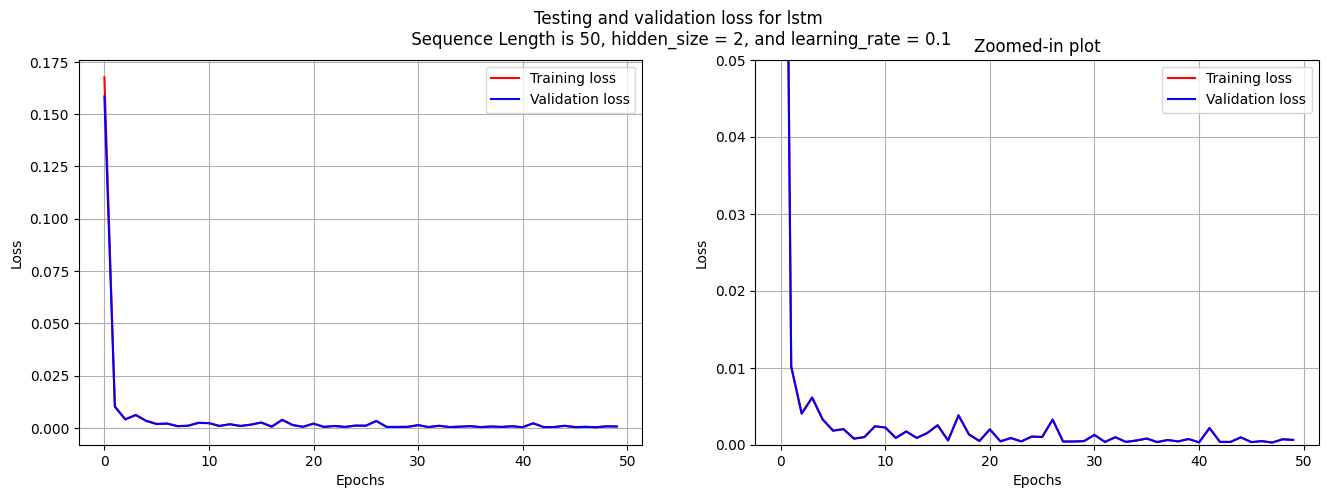


Training with seq_len=50, hidden_size=2, optimizer=adam, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.167139
Test  Avg loss: 0.157068
Epoch 2 -------------------
Train Avg loss: 0.166853
Test  Avg loss: 0.157551
Epoch 3 -------------------
Train Avg loss: 0.166544
Test  Avg loss: 0.157424
Epoch 4 -------------------
Train Avg loss: 0.166351
Test  Avg loss: 0.157619
Epoch 5 -------------------
Train Avg loss: 0.167518
Test  Avg loss: 0.158128
Epoch 6 -------------------
Train Avg loss: 0.166908
Test  Avg loss: 0.158506
Epoch 7 -------------------
Train Avg loss: 0.166140
Test  Avg loss: 0.158066
Epoch 8 -------------------
Train Avg loss: 0.149523
Test  Avg loss: 0.140895
Epoch 9 -------------------
Train Avg loss: 0.005728
Test  Avg loss: 0.005396
Epoch 10 -------------------
Train Avg loss: 0.003213
Test  Avg loss: 0.002955
Epoch 11 -------------------
Train Avg loss: 0.002256
Test  Avg loss: 0.002055
Epoch 12 -------------------
Train Avg loss: 0.001626
Test  Avg

Train Avg loss: 0.000064
Test  Avg loss: 0.000063
Done!


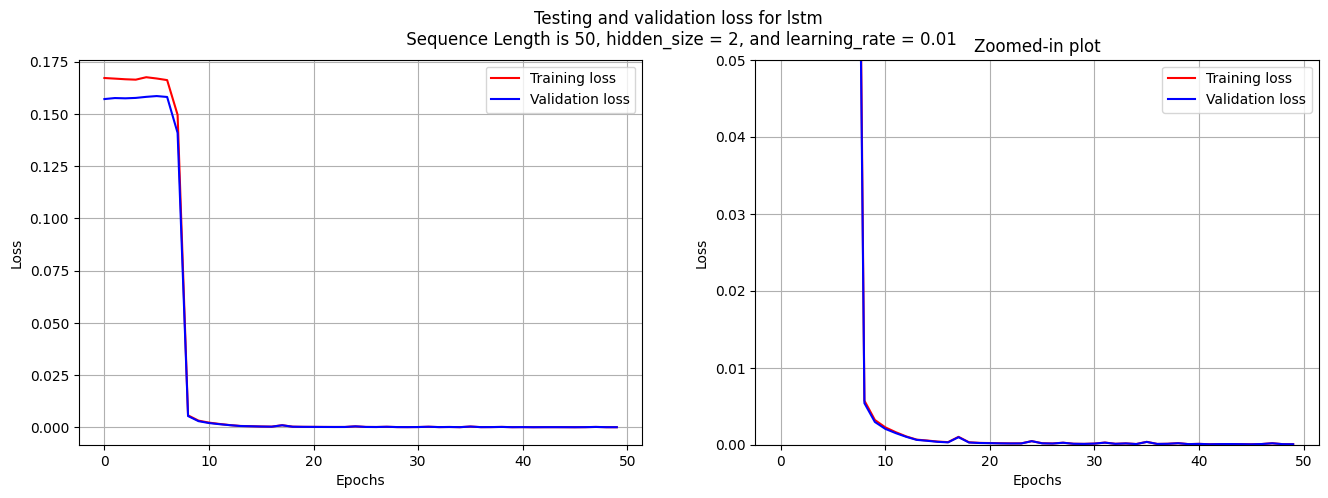


Training with seq_len=50, hidden_size=2, optimizer=adam, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.262424
Test  Avg loss: 0.248301
Epoch 2 -------------------
Train Avg loss: 0.168434
Test  Avg loss: 0.159589
Epoch 3 -------------------
Train Avg loss: 0.168293
Test  Avg loss: 0.157753
Epoch 4 -------------------
Train Avg loss: 0.167733
Test  Avg loss: 0.157930
Epoch 5 -------------------
Train Avg loss: 0.167855
Test  Avg loss: 0.159331
Epoch 6 -------------------
Train Avg loss: 0.167414
Test  Avg loss: 0.158400
Epoch 7 -------------------
Train Avg loss: 0.166907
Test  Avg loss: 0.159582
Epoch 8 -------------------
Train Avg loss: 0.167106
Test  Avg loss: 0.157057
Epoch 9 -------------------
Train Avg loss: 0.166777
Test  Avg loss: 0.157579
Epoch 10 -------------------
Train Avg loss: 0.166405
Test  Avg loss: 0.159020
Epoch 11 -------------------
Train Avg loss: 0.166310
Test  Avg loss: 0.159381
Epoch 12 -------------------
Train Avg loss: 0.166228
Test  Av

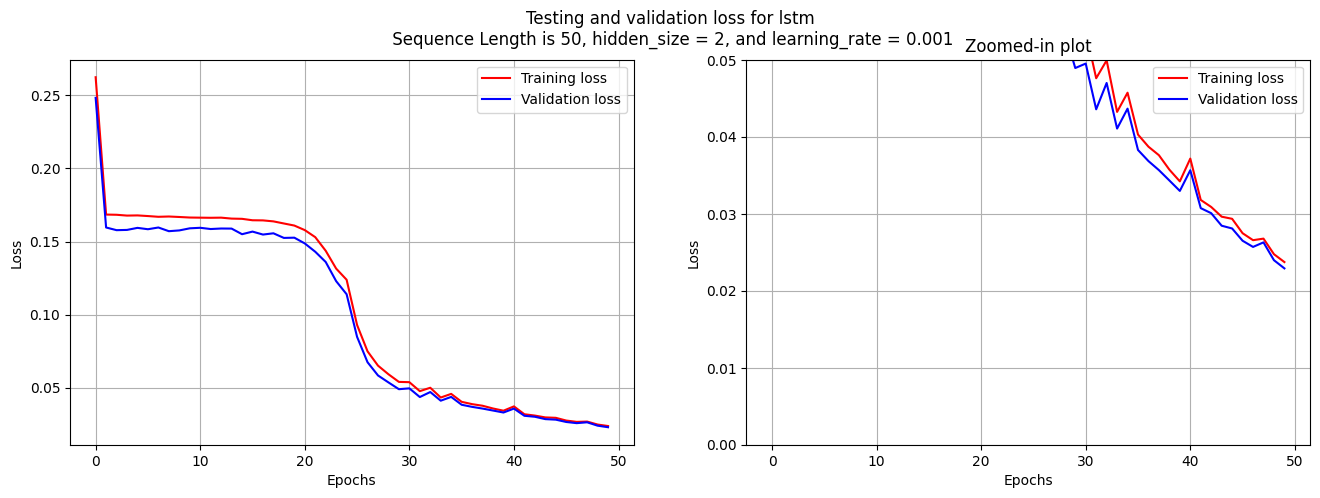


Training with seq_len=50, hidden_size=5, optimizer=sgd, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.167136
Test  Avg loss: 0.158332
Epoch 2 -------------------
Train Avg loss: 0.167222
Test  Avg loss: 0.157478
Epoch 3 -------------------
Train Avg loss: 0.166923
Test  Avg loss: 0.157886
Epoch 4 -------------------
Train Avg loss: 0.166516
Test  Avg loss: 0.157349
Epoch 5 -------------------
Train Avg loss: 0.166488
Test  Avg loss: 0.156663
Epoch 6 -------------------
Train Avg loss: 0.166582
Test  Avg loss: 0.158055
Epoch 7 -------------------
Train Avg loss: 0.167754
Test  Avg loss: 0.159254
Epoch 8 -------------------
Train Avg loss: 0.167997
Test  Avg loss: 0.158849
Epoch 9 -------------------
Train Avg loss: 0.166834
Test  Avg loss: 0.157974
Epoch 10 -------------------
Train Avg loss: 0.166728
Test  Avg loss: 0.157906
Epoch 11 -------------------
Train Avg loss: 0.168476
Test  Avg loss: 0.159409
Epoch 12 -------------------
Train Avg loss: 0.166669
Test  Avg l

Train Avg loss: 0.176308
Test  Avg loss: 0.170063
Done!


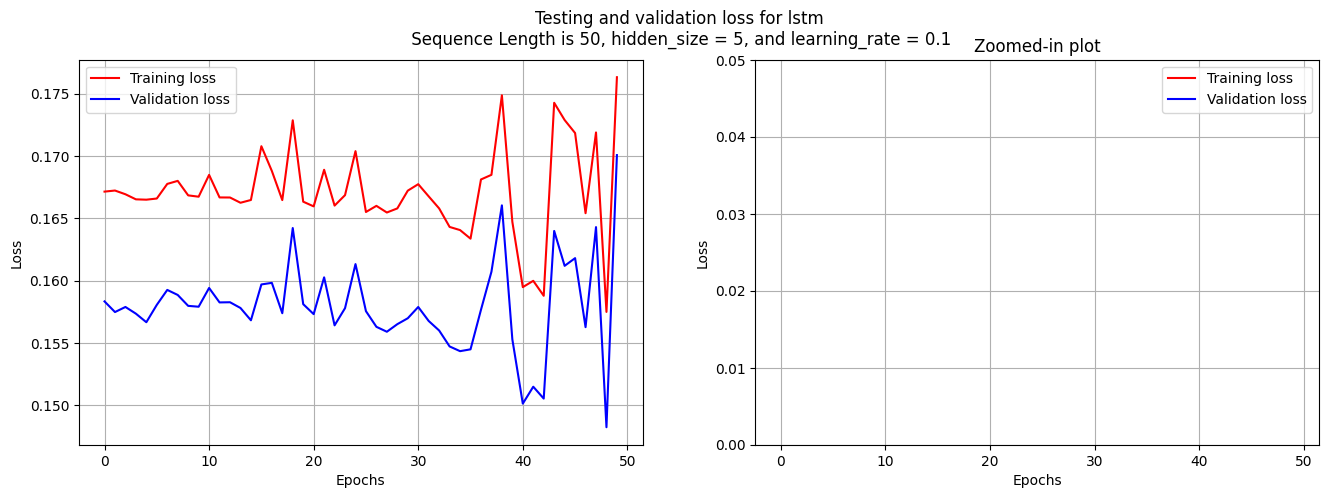


Training with seq_len=50, hidden_size=5, optimizer=sgd, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.166993
Test  Avg loss: 0.158292
Epoch 2 -------------------
Train Avg loss: 0.166435
Test  Avg loss: 0.157303
Epoch 3 -------------------
Train Avg loss: 0.166744
Test  Avg loss: 0.156974
Epoch 4 -------------------
Train Avg loss: 0.166631
Test  Avg loss: 0.156814
Epoch 5 -------------------
Train Avg loss: 0.166268
Test  Avg loss: 0.158210
Epoch 6 -------------------
Train Avg loss: 0.166392
Test  Avg loss: 0.158584
Epoch 7 -------------------
Train Avg loss: 0.166620
Test  Avg loss: 0.157739
Epoch 8 -------------------
Train Avg loss: 0.166075
Test  Avg loss: 0.157476
Epoch 9 -------------------
Train Avg loss: 0.166781
Test  Avg loss: 0.157086
Epoch 10 -------------------
Train Avg loss: 0.166700
Test  Avg loss: 0.157538
Epoch 11 -------------------
Train Avg loss: 0.166597
Test  Avg loss: 0.157861
Epoch 12 -------------------
Train Avg loss: 0.166799
Test  Avg 

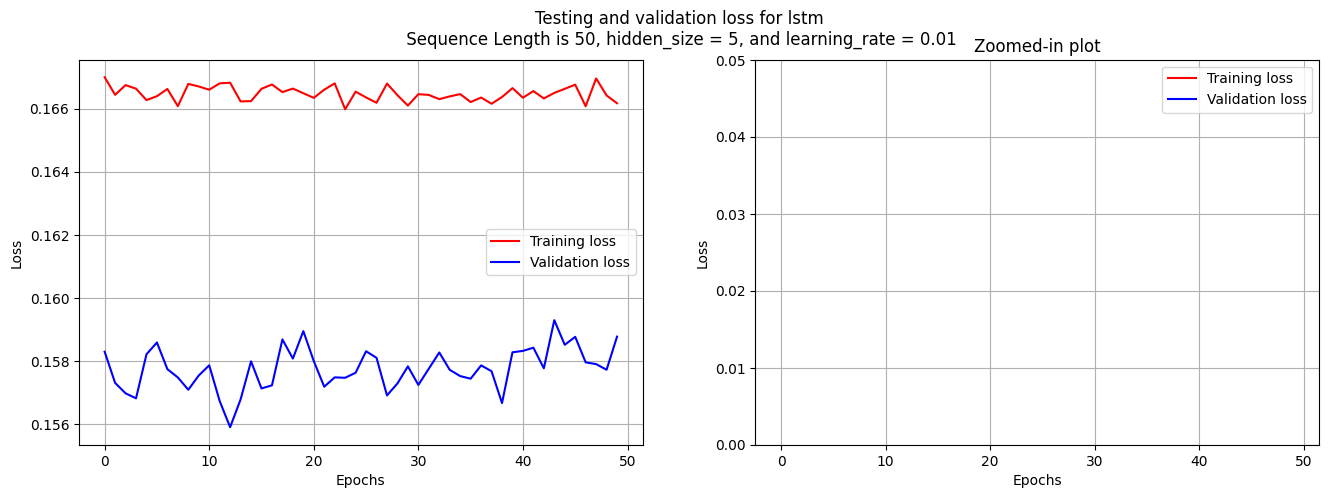


Training with seq_len=50, hidden_size=5, optimizer=sgd, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.974981
Test  Avg loss: 0.954972
Epoch 2 -------------------
Train Avg loss: 0.478698
Test  Avg loss: 0.462961
Epoch 3 -------------------
Train Avg loss: 0.286708
Test  Avg loss: 0.272914
Epoch 4 -------------------
Train Avg loss: 0.211703
Test  Avg loss: 0.198885
Epoch 5 -------------------
Train Avg loss: 0.183621
Test  Avg loss: 0.174275
Epoch 6 -------------------
Train Avg loss: 0.172766
Test  Avg loss: 0.163460
Epoch 7 -------------------
Train Avg loss: 0.168916
Test  Avg loss: 0.158867
Epoch 8 -------------------
Train Avg loss: 0.167700
Test  Avg loss: 0.158140
Epoch 9 -------------------
Train Avg loss: 0.166828
Test  Avg loss: 0.157538
Epoch 10 -------------------
Train Avg loss: 0.166354
Test  Avg loss: 0.157418
Epoch 11 -------------------
Train Avg loss: 0.166116
Test  Avg loss: 0.157217
Epoch 12 -------------------
Train Avg loss: 0.166485
Test  Avg

Train Avg loss: 0.166346
Test  Avg loss: 0.156174
Done!


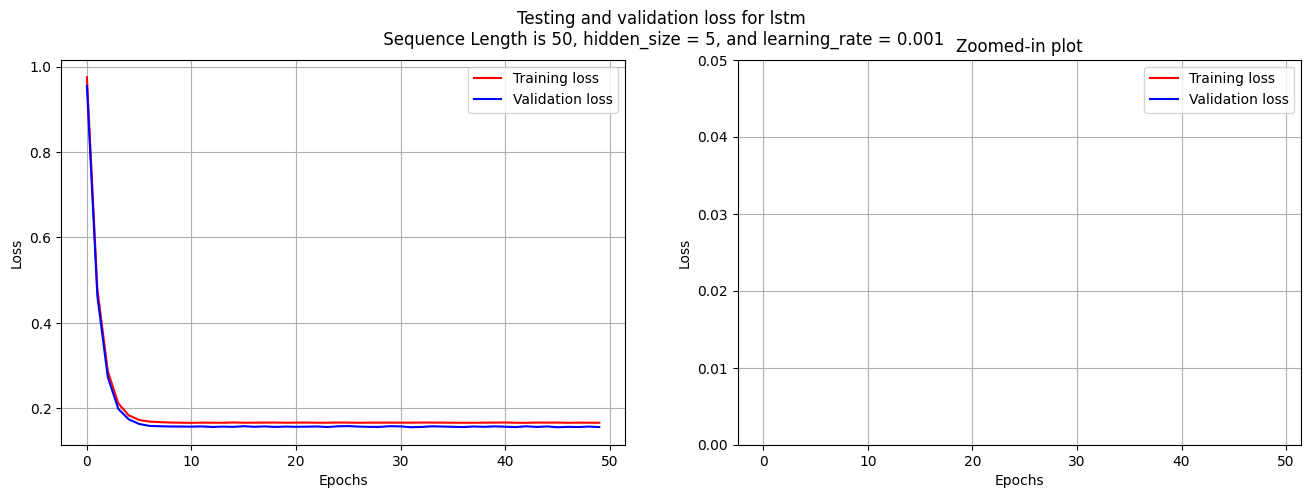


Training with seq_len=50, hidden_size=5, optimizer=adam, learning_rate=0.1
Epoch 1 -------------------
Train Avg loss: 0.166928
Test  Avg loss: 0.157734
Epoch 2 -------------------
Train Avg loss: 0.166348
Test  Avg loss: 0.160938
Epoch 3 -------------------
Train Avg loss: 0.158726
Test  Avg loss: 0.149390
Epoch 4 -------------------
Train Avg loss: 0.053523
Test  Avg loss: 0.054616
Epoch 5 -------------------
Train Avg loss: 0.004364
Test  Avg loss: 0.003987
Epoch 6 -------------------
Train Avg loss: 0.002484
Test  Avg loss: 0.002242
Epoch 7 -------------------
Train Avg loss: 0.001426
Test  Avg loss: 0.001274
Epoch 8 -------------------
Train Avg loss: 0.001817
Test  Avg loss: 0.001606
Epoch 9 -------------------
Train Avg loss: 0.001840
Test  Avg loss: 0.001818
Epoch 10 -------------------
Train Avg loss: 0.001348
Test  Avg loss: 0.001240
Epoch 11 -------------------
Train Avg loss: 0.000397
Test  Avg loss: 0.000367
Epoch 12 -------------------
Train Avg loss: 0.000866
Test  Avg 

Train Avg loss: 0.000099
Test  Avg loss: 0.000096
Done!


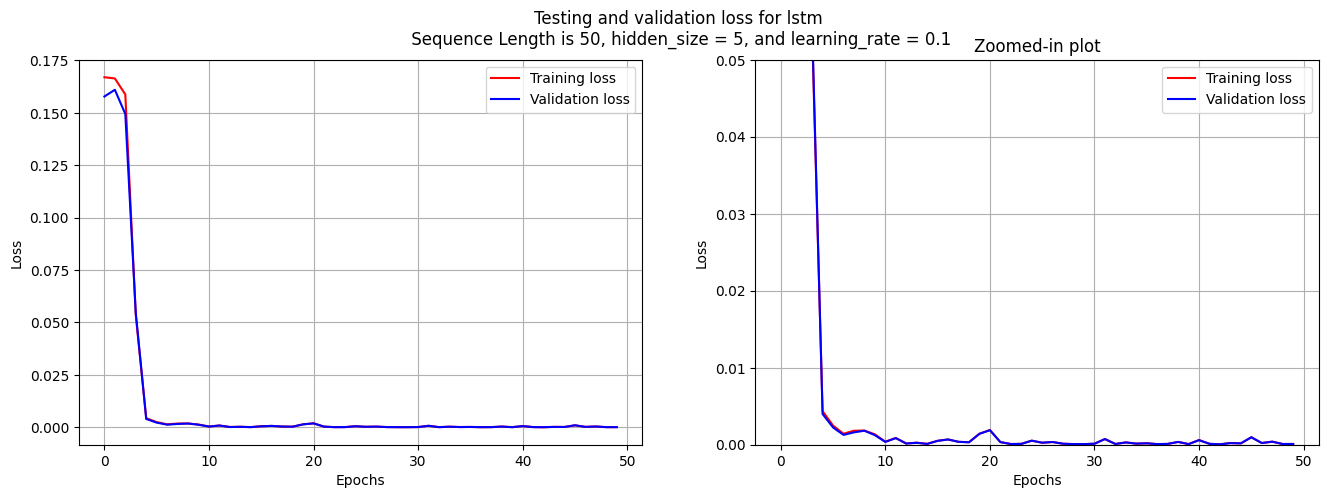


Training with seq_len=50, hidden_size=5, optimizer=adam, learning_rate=0.01
Epoch 1 -------------------
Train Avg loss: 0.167217
Test  Avg loss: 0.158758
Epoch 2 -------------------
Train Avg loss: 0.166787
Test  Avg loss: 0.157853
Epoch 3 -------------------
Train Avg loss: 0.166424
Test  Avg loss: 0.158564
Epoch 4 -------------------
Train Avg loss: 0.165999
Test  Avg loss: 0.155806
Epoch 5 -------------------
Train Avg loss: 0.163594
Test  Avg loss: 0.155015
Epoch 6 -------------------
Train Avg loss: 0.139727
Test  Avg loss: 0.131366
Epoch 7 -------------------
Train Avg loss: 0.009256
Test  Avg loss: 0.008900
Epoch 8 -------------------
Train Avg loss: 0.009736
Test  Avg loss: 0.009684
Epoch 9 -------------------
Train Avg loss: 0.004582
Test  Avg loss: 0.004326
Epoch 10 -------------------
Train Avg loss: 0.004305
Test  Avg loss: 0.004241
Epoch 11 -------------------
Train Avg loss: 0.002784
Test  Avg loss: 0.002707
Epoch 12 -------------------
Train Avg loss: 0.001975
Test  Avg

Train Avg loss: 0.000114
Test  Avg loss: 0.000155
Done!


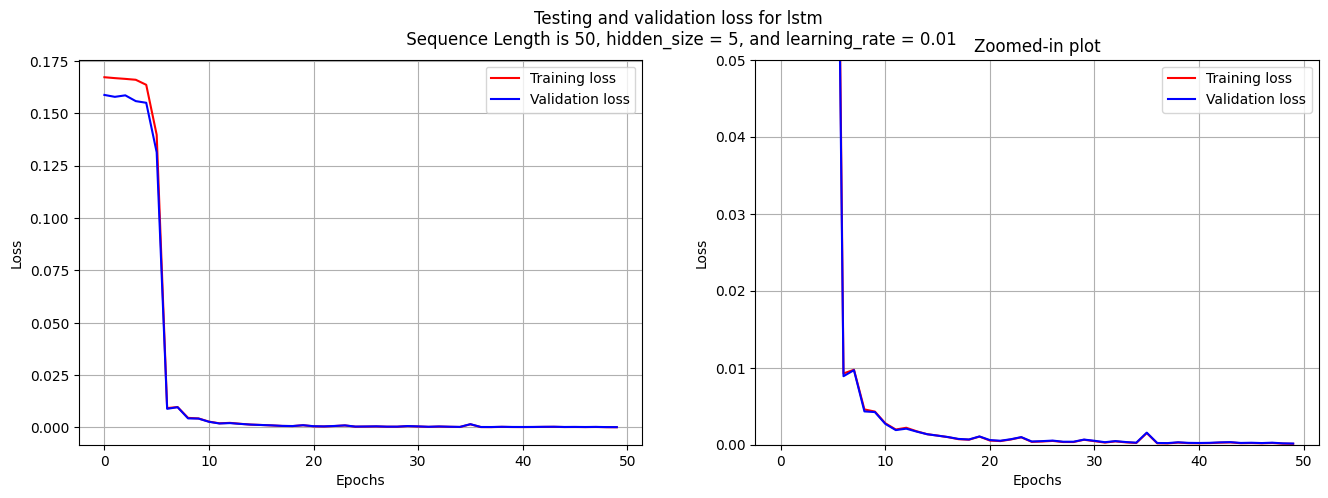


Training with seq_len=50, hidden_size=5, optimizer=adam, learning_rate=0.001
Epoch 1 -------------------
Train Avg loss: 0.167135
Test  Avg loss: 0.157277
Epoch 2 -------------------
Train Avg loss: 0.166382
Test  Avg loss: 0.157177
Epoch 3 -------------------
Train Avg loss: 0.166237
Test  Avg loss: 0.155993
Epoch 4 -------------------
Train Avg loss: 0.166338
Test  Avg loss: 0.157129
Epoch 5 -------------------
Train Avg loss: 0.166223
Test  Avg loss: 0.159079
Epoch 6 -------------------
Train Avg loss: 0.166075
Test  Avg loss: 0.157899
Epoch 7 -------------------
Train Avg loss: 0.166176
Test  Avg loss: 0.158340
Epoch 8 -------------------
Train Avg loss: 0.165683
Test  Avg loss: 0.155761
Epoch 9 -------------------
Train Avg loss: 0.165699
Test  Avg loss: 0.157324
Epoch 10 -------------------
Train Avg loss: 0.165315
Test  Avg loss: 0.157509
Epoch 11 -------------------
Train Avg loss: 0.165553
Test  Avg loss: 0.155712
Epoch 12 -------------------
Train Avg loss: 0.165198
Test  Av

Train Avg loss: 0.006226
Test  Avg loss: 0.006302
Done!


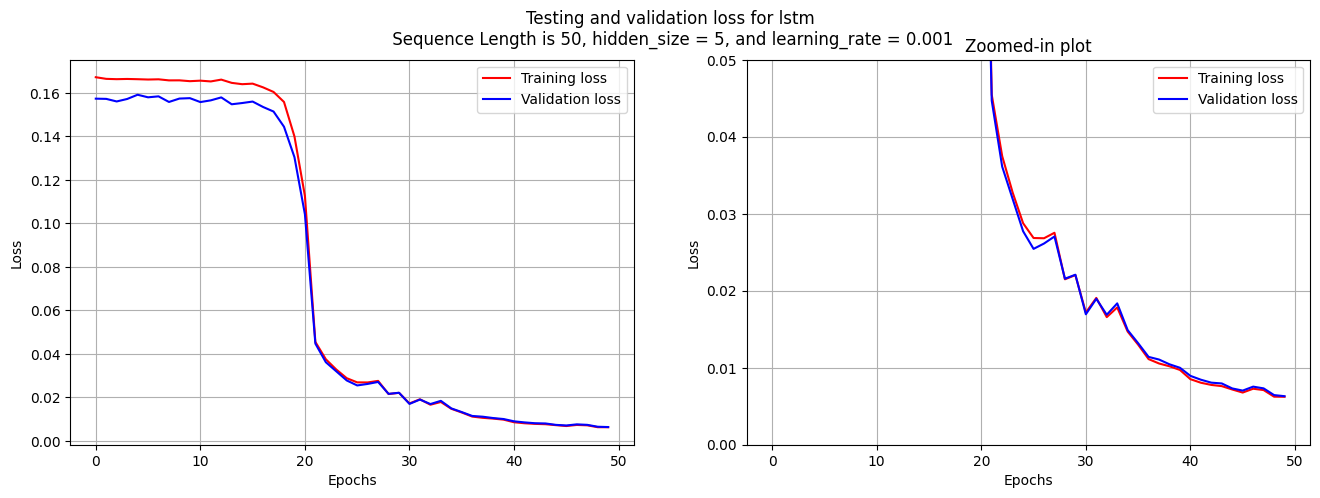


Best models for each sequence length:

Sequence length 10:
Best parameters: hidden_size=2, optimizer=adam, learning_rate=0.01
Final validation loss: 0.0001

Sequence length 25:
Best parameters: hidden_size=5, optimizer=adam, learning_rate=0.1
Final validation loss: 0.0001

Sequence length 50:
Best parameters: hidden_size=2, optimizer=adam, learning_rate=0.01
Final validation loss: 0.0001

Overall best model:
Parameters: sequence_length=50, hidden_size=2, optimizer=adam, learning_rate=0.01
Final validation loss: 0.0001


In [12]:
# @title Automate LSTM grid search
reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)

# Fixed parameters
LSTM_input_size = 2
LSTM_output_size = 1
batch_size = 64
max_epoch = 50

# Define hyperparameter grid
sequence_lengths = [10, 25, 50]
hidden_sizes = [2, 5]
optimizers = ['sgd', 'adam']
learning_rates = [0.1, 0.01, 0.001]

# Dictionary to store results
results = {}

# Grid search
for seq_len in sequence_lengths:
    # Get the appropriate datasets for this sequence length
    train_data = globals()[f'Add{seq_len}Trainset']
    val_data = globals()[f'Add{seq_len}Valset']

    for hidden_size in hidden_sizes:
        for opt in optimizers:
            for lr in learning_rates:
                print(f"\nTraining with seq_len={seq_len}, hidden_size={hidden_size}, "
                      f"optimizer={opt}, learning_rate={lr}")

                model, train_loss, val_loss = TrainLSTM.train1LayerLSTM(
                    train_data,
                    val_data,
                    LSTM_input_size,
                    LSTM_output_size,
                    hidden_size,
                    optimizer_name=opt,
                    lr=lr,
                    batch_size=batch_size,
                    max_epoch=max_epoch
                )

                # Store results
                key = f"seq{seq_len}_h{hidden_size}_{opt}_lr{lr}"
                results[key] = {
                    'model': model,
                    'train_loss': train_loss,
                    'val_loss': val_loss,
                    'params': {
                        'seq_len': seq_len,
                        'hidden_size': hidden_size,
                        'optimizer': opt,
                        'lr': lr
                    }
                }

                # Plot individual training run
                util.plot_loss(
                    train_loss,
                    val_loss,
                    sequence_len=seq_len,
                    hidden_size=hidden_size,
                    lr=lr,
                    model_type='lstm'
                )

# Find best model for each sequence length
print("\nBest models for each sequence length:")
for seq_len in sequence_lengths:
    seq_results = {k: v for k, v in results.items() if v['params']['seq_len'] == seq_len}
    best_key = min(seq_results.keys(), key=lambda k: results[k]['val_loss'][-1])
    print(f"\nSequence length {seq_len}:")
    print(f"Best parameters: hidden_size={results[best_key]['params']['hidden_size']}, "
          f"optimizer={results[best_key]['params']['optimizer']}, "
          f"learning_rate={results[best_key]['params']['lr']}")
    print(f"Final validation loss: {results[best_key]['val_loss'][-1]:.4f}")

# Find overall best model
best_key = min(results.keys(), key=lambda k: results[k]['val_loss'][-1])
print(f"\nOverall best model:")
print(f"Parameters: sequence_length={results[best_key]['params']['seq_len']}, "
      f"hidden_size={results[best_key]['params']['hidden_size']}, "
      f"optimizer={results[best_key]['params']['optimizer']}, "
      f"learning_rate={results[best_key]['params']['lr']}")
print(f"Final validation loss: {results[best_key]['val_loss'][-1]:.4f}")